# Sparkling Wine Sales Forecast


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA

In [34]:
df1 = pd.read_csv(r"C:\Users\LOKI\Downloads\Sparkling.csv")
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [35]:
df1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [36]:
df1.columns

Index(['YearMonth', 'Sparkling'], dtype='object')

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [38]:
dates = pd.date_range(start='1980-01-01', freq='M', periods=len(df1))
df1.drop(['YearMonth'], axis=1, inplace = True)
df1.set_index(dates, inplace=True)

In [39]:
df1.shape

(187, 1)

In [40]:
df1.head()

Sparkling
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Freq: M
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [42]:
df1.isnull().sum()

Sparkling    0
dtype: int64

## Plotting the Time Series data

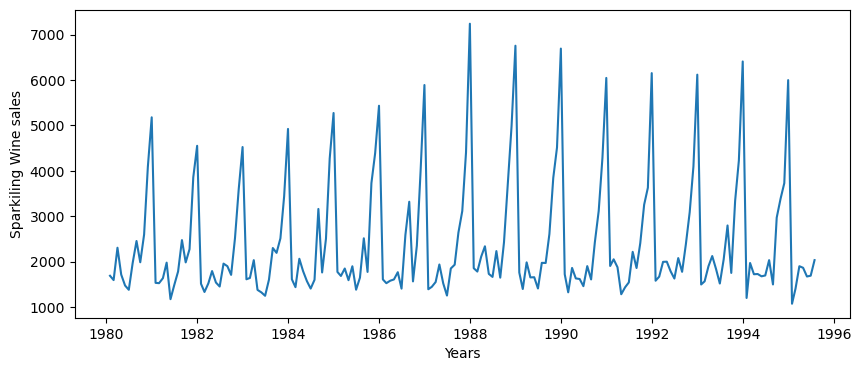

In [43]:
plt.figure(figsize=(10, 4))
plt.plot(df1)
plt.xlabel("Years")
plt.ylabel("Sparkiling Wine sales");

## Exploratory Data Analysis (EDA)

In [44]:
df1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

### Yearly Boxplot

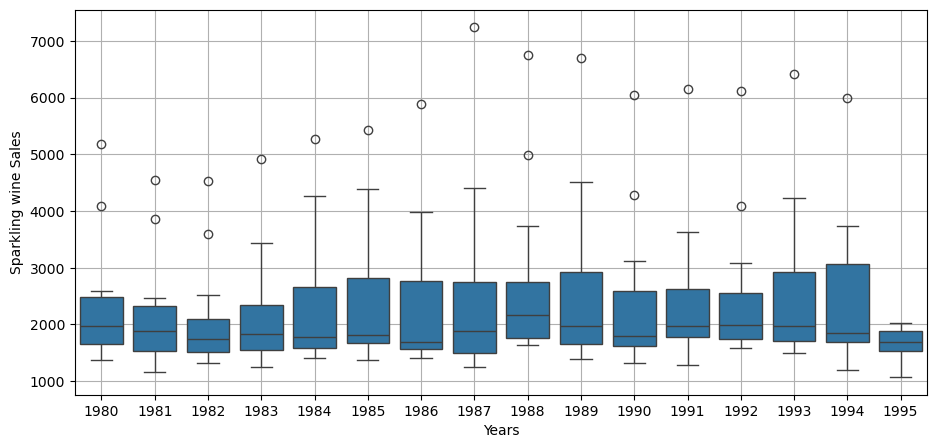

In [46]:
sns.boxplot(x=df1.index.year, y=df1["Sparkling"])
plt.xlabel("Years")
plt.ylabel("Sparkling wine Sales")
plt.grid();

### Monthly Plot

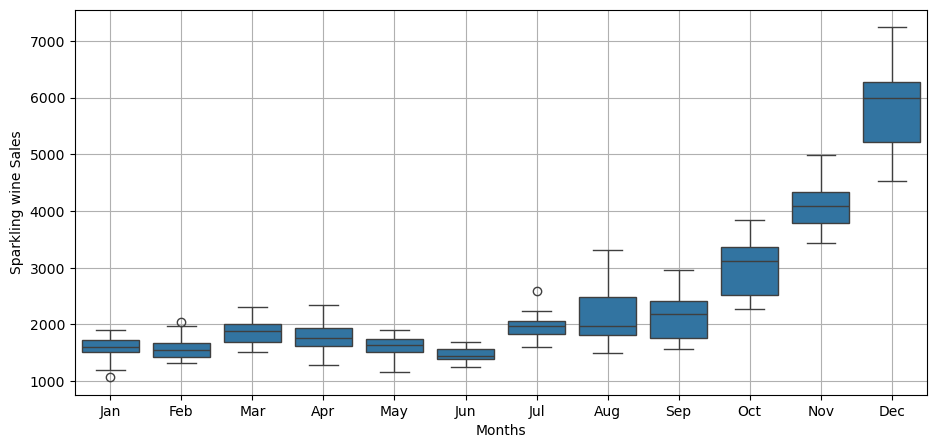

In [47]:
sns.boxplot(x = df1.index.strftime('%b'), y =df1["Sparkling"])
plt.xlabel("Months")
plt.ylabel("Sparkling wine Sales")
plt.grid();

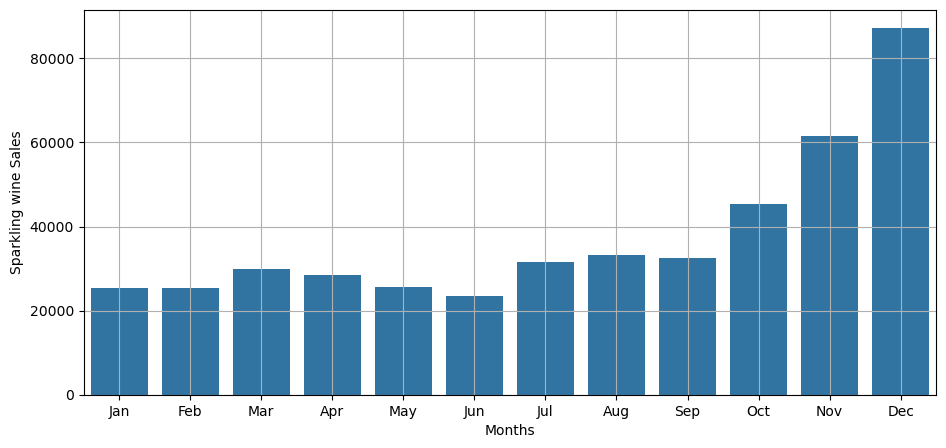

In [48]:
sns.barplot(x = df1.index.strftime('%b'), y =df1["Sparkling"], estimator=sum, errorbar=None)
plt.xlabel("Months")
plt.ylabel("Sparkling wine Sales")
plt.grid();

### Time series Month-plot

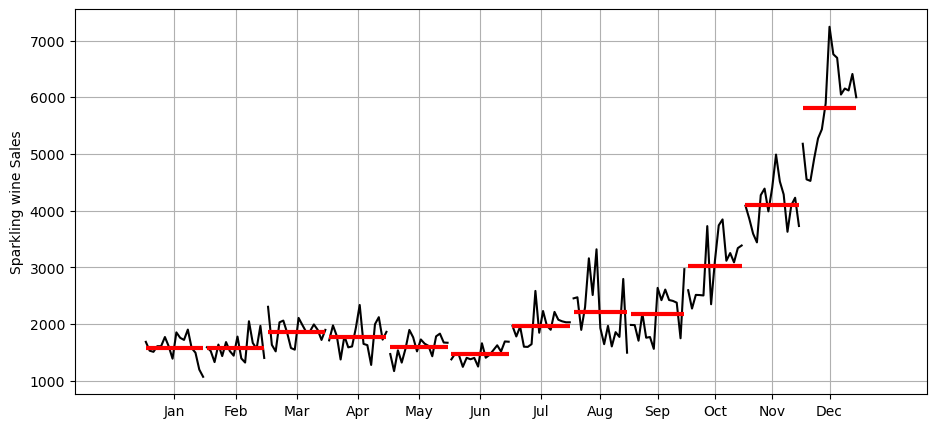

In [49]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df1['Sparkling'],ylabel='Sparkling wine Sales')
plt.grid();

### Monthly sales

In [50]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.strftime('%b'), index = df1.index.year)
monthly_sales_across_years

Apr     Aug     Dec     Feb     Jan     Jul     Jun     Mar     May  \
1980  1712.0  2453.0  5179.0  1591.0  1686.0  1966.0  1377.0  2304.0  1471.0   
1981  1976.0  2472.0  4551.0  1523.0  1530.0  1781.0  1480.0  1633.0  1170.0   
1982  1790.0  1897.0  4524.0  1329.0  1510.0  1954.0  1449.0  1518.0  1537.0   
1983  1375.0  2298.0  4923.0  1638.0  1609.0  1600.0  1245.0  2030.0  1320.0   
1984  1789.0  3159.0  5274.0  1435.0  1609.0  1597.0  1404.0  2061.0  1567.0   
1985  1589.0  2512.0  5434.0  1682.0  1771.0  1645.0  1379.0  1846.0  1896.0   
1986  1605.0  3318.0  5891.0  1523.0  1606.0  2584.0  1403.0  1577.0  1765.0   
1987  1935.0  1930.0  7242.0  1442.0  1389.0  1847.0  1250.0  1548.0  1518.0   
1988  2336.0  1645.0  6757.0  1779.0  1853.0  2230.0  1661.0  2108.0  1728.0   
1989  1650.0  1968.0  6694.0  1394.0  1757.0  1971.0  1406.0  1982.0  1654.0   
1990  1628.0  1605.0  6047.0  1321.0  1720.0  1899.0  1457.0  1859.0  1615.0   
1991  1279.0  1857.0  6153.0  2049.0  1902.0  2214.0  1540.0  1874.0  1432.0   
1992  1997.0  1773.0  6119.0  1667.0  1577.0  2076.0  1625.0  1993.0  1783.0   
1993  2121.0  2795.0  6410.0  1564.0  1494.0  2048.0  1515.0  1898.0  1831.0   
1994  1725.0  1495.0  5999.0  1968.0  1197.0  2031.0  1693.0  1720.0  1674.0   
1995  1862.0     NaN     NaN  1402.0  1070.0  2031.0  1688.0  1897.0  1670.0   

         Nov     Oct     Sep  
1980  4087.0  2596.0  1984.0  
1981  3857.0  2273.0  1981.0  
1982  3593.0  2514.0  1706.0  
1983  3440.0  2511.0  2191.0  
1984  4273.0  2504.0  1759.0  
1985  4388.0  3727.0  1771.0  
1986  3987.0  2349.0  1562.0  
1987  4405.0  3114.0  2638.0  
1988  4988.0  3740.0  2421.0  
1989  4514.0  3845.0  2608.0  
1990  4286.0  3116.0  2424.0  
1991  3627.0  3252.0  2408.0  
1992  4096.0  3088.0  2377.0  
1993  4227.0  3339.0  1749.0  
1994  3729.0  3385.0  2968.0  
1995     NaN     NaN     NaN

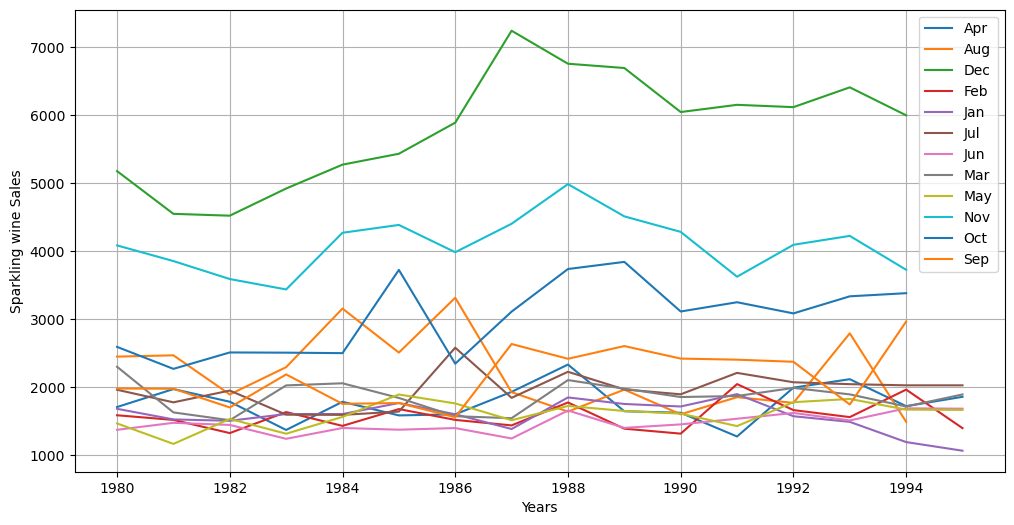

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6
monthly_sales_across_years.plot()
plt.xlabel("Years")
plt.ylabel("Sparkling wine Sales")
plt.grid()
plt.legend(loc='best');

### Empirical Cumulative Distribution

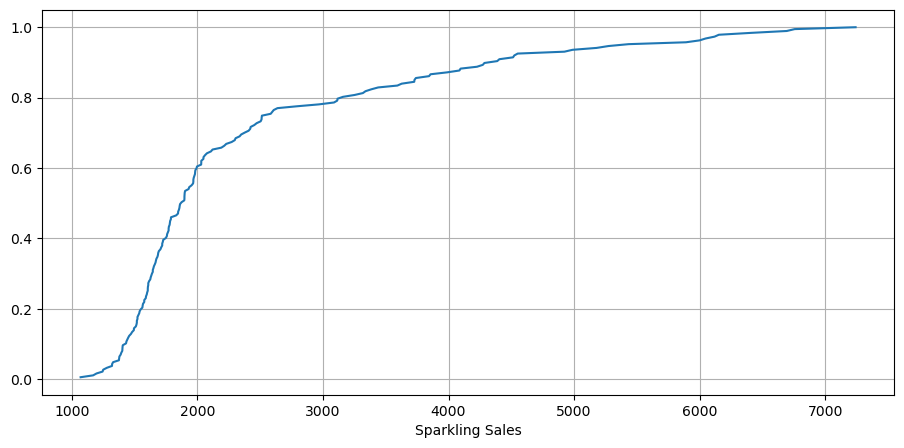

In [52]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (11, 5))
cdf = ECDF(df1['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Sales');

### Average Sales and Percent change

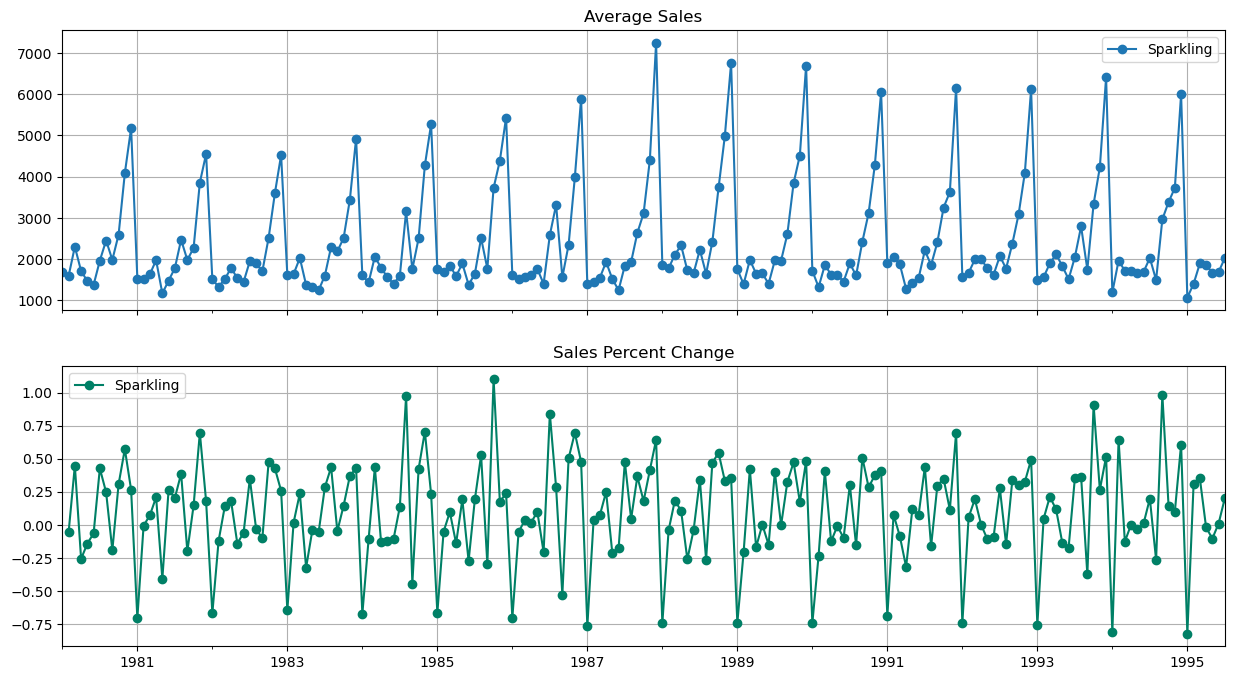

In [53]:
# group by date and get average RetailSales, and precent change
average    = df1.groupby(df1.index)["Sparkling"].mean()
pct_change = df1.groupby(df1.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

### TIME SERIES DECOMPOSITION

### Additive Decomposition

In [54]:
plt.rcParams["figure.figsize"] = (8, 6)

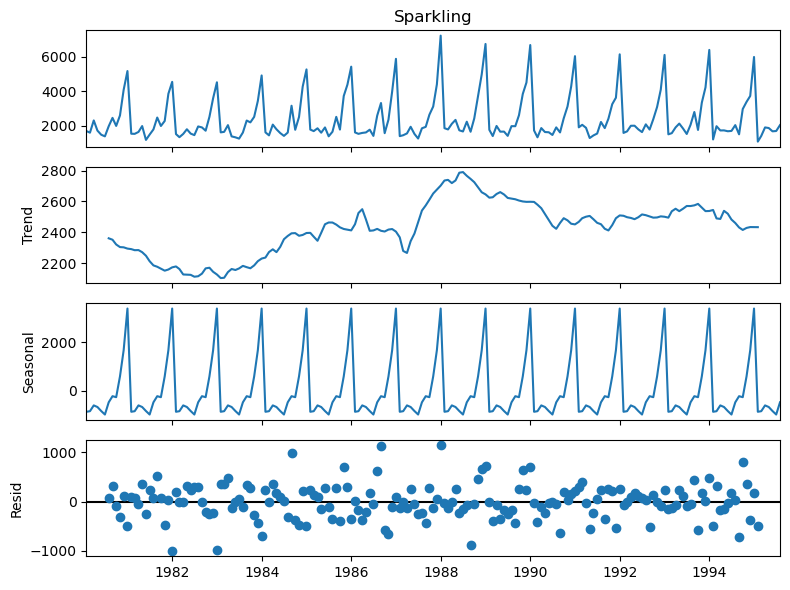

In [55]:
decomposition = sm.tsa.seasonal_decompose(df1['Sparkling'], model='additive')
decomposition.plot();

In [56]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64 

Seasonality 
 1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Freq: M, Name: seasonal, dtype: float64 

Residual 
 1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
1980-11-30  

### Multiplicative Decomposition

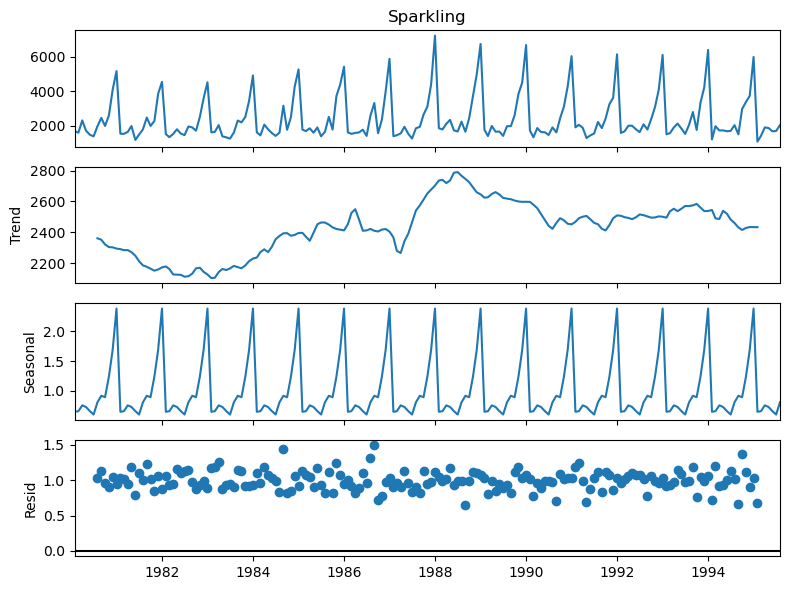

In [57]:
decomposition = sm.tsa.seasonal_decompose(df1['Sparkling'], model='multiplicative')
decomposition.plot();

In [58]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64 

Seasonality 
 1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Freq: M, Name: seasonal, dtype: float64 

Residual 
 1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Freq: M, Name: resid, 

## Data Pre-processing

### Missing value treatment

In [59]:
df1.isnull().sum()

Sparkling    0
dtype: int64

### Train-Test Split

In [60]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [61]:
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [62]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Visualizing the train-test data

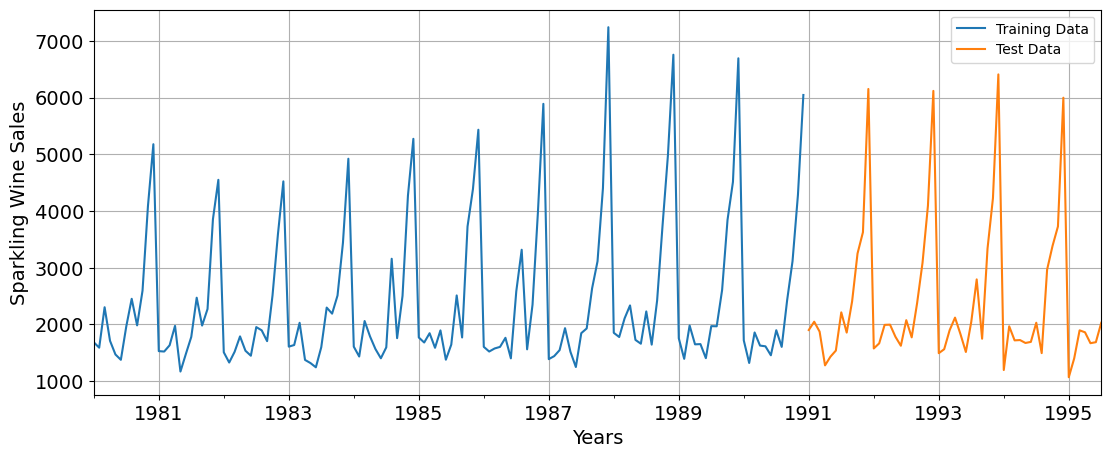

In [63]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.xlabel("Years",fontsize=14)
plt.ylabel("Sparkling Wine Sales",fontsize=14)
plt.show()

# Model Building - Original Data

## Model 1: Linear Regression

In [64]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [65]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [66]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [67]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

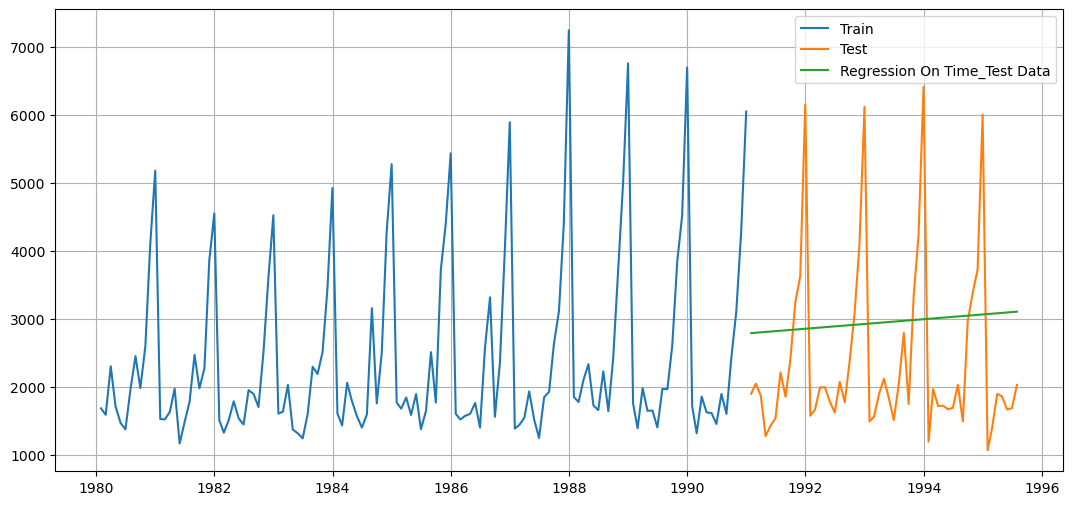

In [68]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [69]:
rmse_model1_test = metrics.root_mean_squared_error(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [70]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression Model'])
resultsDf

Test RMSE
Linear Regression Model  1389.135175

## Model 2: Simple Average

In [71]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [72]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

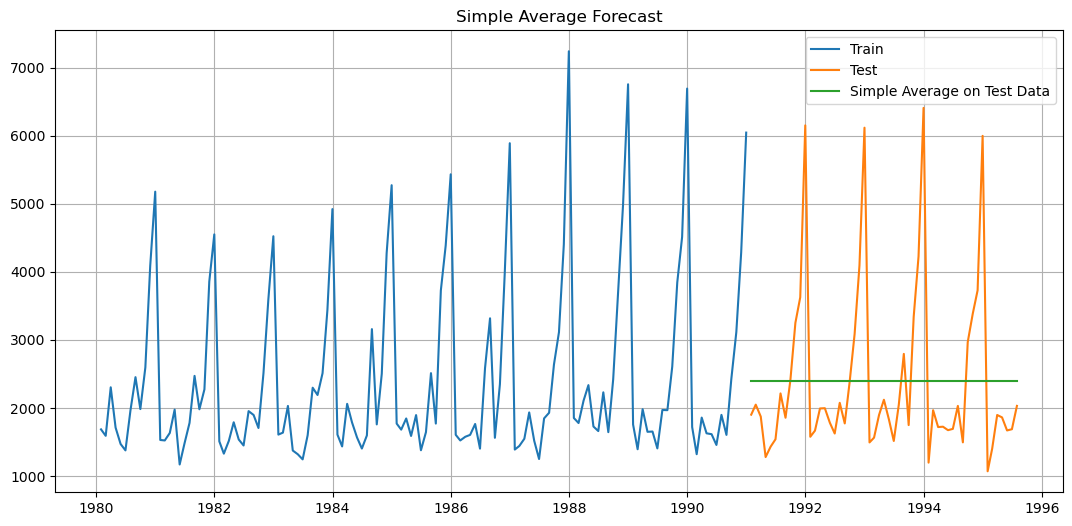

In [73]:
plt.figure(figsize=(13,6))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [74]:
rmse_model3_test = metrics.root_mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [75]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression Model  1389.135175
SimpleAverageModel       1275.081804

## Model 3: Moving Average

In [76]:
MovingAverage = df1.copy()
MovingAverage.head()

Sparkling
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

#### Trailing moving averages

In [77]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

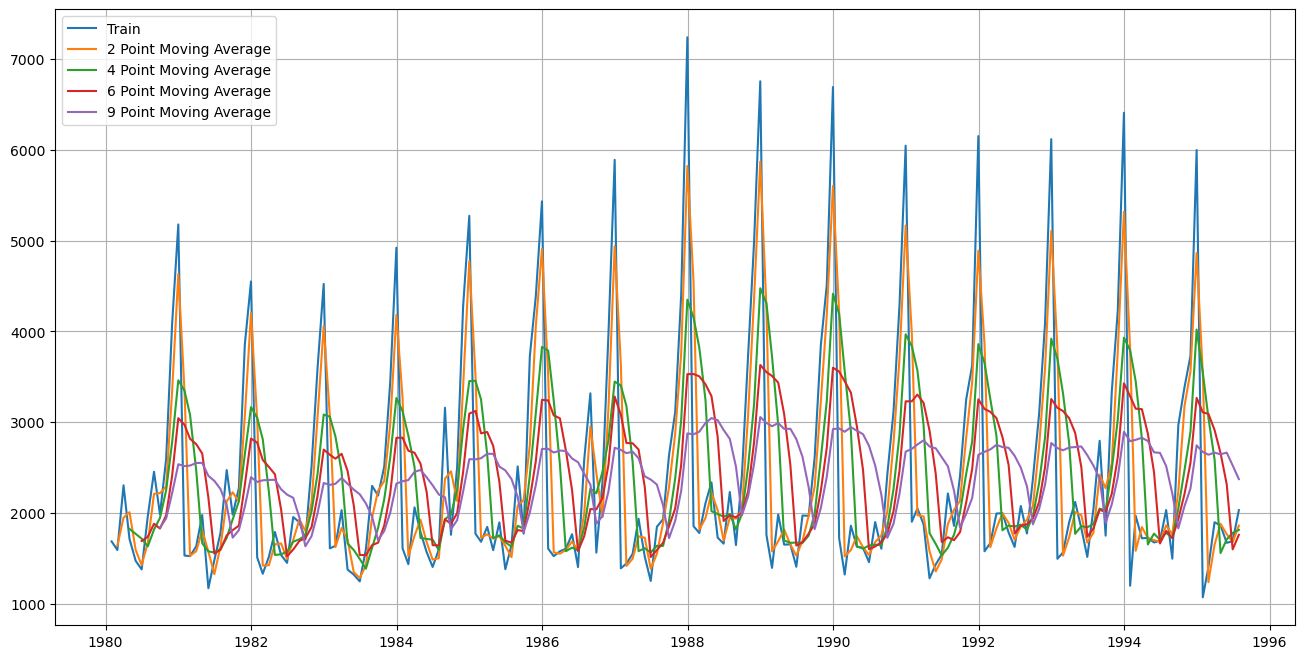

In [78]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [79]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

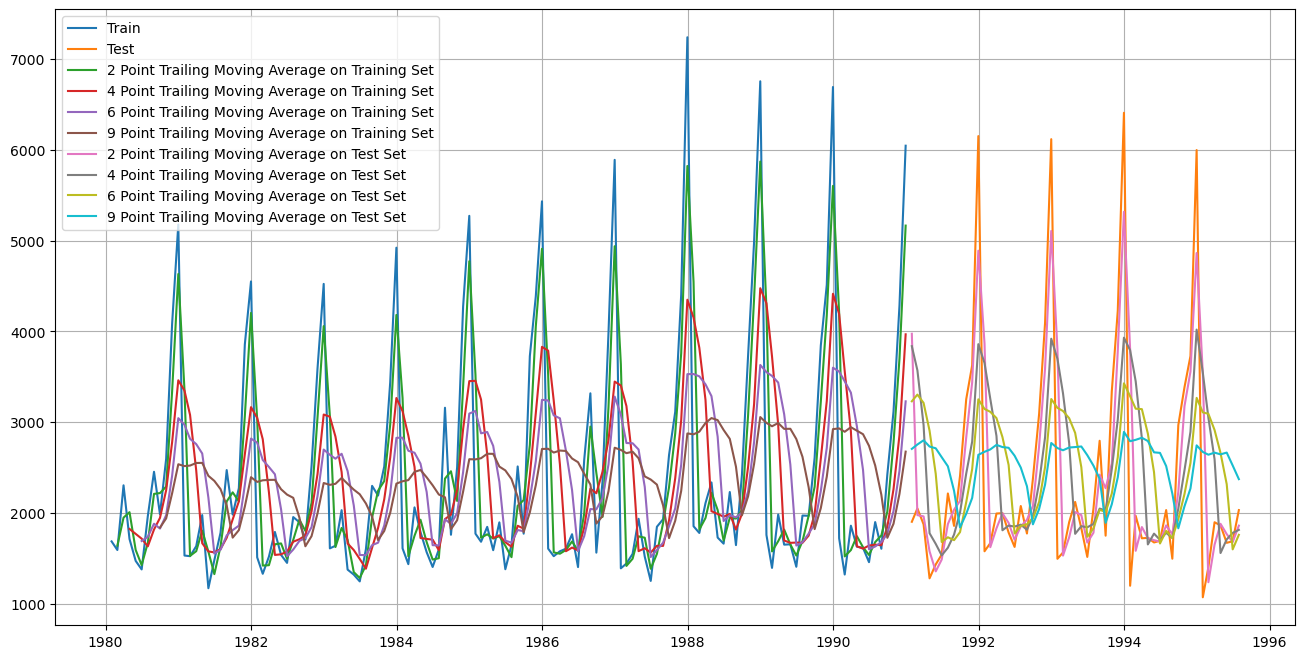

In [80]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [81]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.root_mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.root_mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.root_mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.root_mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [82]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2-point Trailing MovingAverage','4-point Trailing MovingAverage'
                                   ,'6-point Trailing MovingAverage','9-point Trailing MovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression Model         1389.135175
SimpleAverageModel              1275.081804
2-point Trailing MovingAverage   813.400684
4-point Trailing MovingAverage  1156.589694
6-point Trailing MovingAverage  1283.927428
9-point Trailing MovingAverage  1346.278315

## Model 4: Simple Exponential Smoothing

In [83]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [84]:
SES_train = train.copy()
SES_test = test.copy()

In [85]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [86]:
model_SES_autofit = model_SES.fit(optimized=True)

In [87]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
1991-01-31       1902  2676.676366
1991-02-28       2049  2676.676366
1991-03-31       1874  2676.676366
1991-04-30       1279  2676.676366
1991-05-31       1432  2676.676366

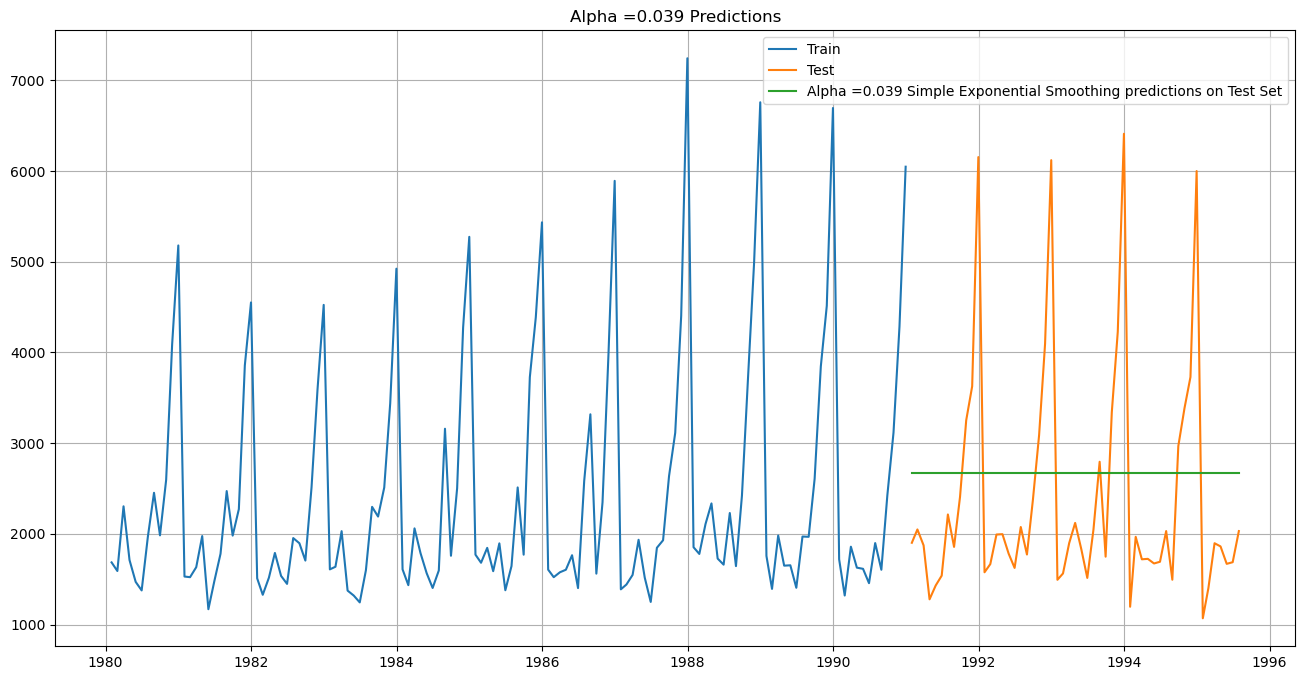

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.039 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.039 Predictions');

### Model Evaluation for $\alpha$ = 0.039 : Simple Exponential Smoothing

In [90]:
## Test Data

rmse_model5_test_1 = metrics.root_mean_squared_error(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha = 0.039 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha = 0.039 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [91]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.039,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression Model                 1389.135175
SimpleAverageModel                      1275.081804
2-point Trailing MovingAverage           813.400684
4-point Trailing MovingAverage          1156.589694
6-point Trailing MovingAverage          1283.927428
9-point Trailing MovingAverage          1346.278315
Alpha=0.039,SimpleExponentialSmoothing  1304.927405

### Iterating with different alpha values to understand which particular value works best for alpha on the test set.

In [92]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [93]:
for i in np.arange(0.1,1,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.root_mean_squared_error(SES_train['Sparkling'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.root_mean_squared_error(SES_test['Sparkling'],SES_test['predict',i])
    
    new_row = pd.DataFrame({'Alpha Values': [i], 
                        'Train RMSE': [rmse_model5_train_i], 
                        'Test RMSE': [rmse_model5_test_i]})

    resultsDf_6 = pd.concat([resultsDf_6, new_row], ignore_index=True)

### Model Evaluation

In [94]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.10  1333.873836  1375.393398
1           0.15  1347.521016  1466.203651
2           0.20  1356.042987  1595.206839
3           0.25  1359.701408  1755.488175
4           0.30  1359.511747  1935.507132
5           0.35  1356.733677  2123.914871
6           0.40  1352.588879  2311.919615
7           0.45  1348.095362  2493.786514
8           0.50  1344.004369  2666.351413
9           0.55  1340.811249  2828.246418
10          0.60  1338.805381  2979.204388
11          0.65  1338.131249  3119.560885
12          0.70  1338.844308  3249.944092
13          0.75  1340.955212  3371.100106
14          0.80  1344.462091  3483.801006
15          0.85  1349.373283  3588.797654
16          0.90  1355.723518  3686.794285
17          0.95  1363.586057  3778.432623

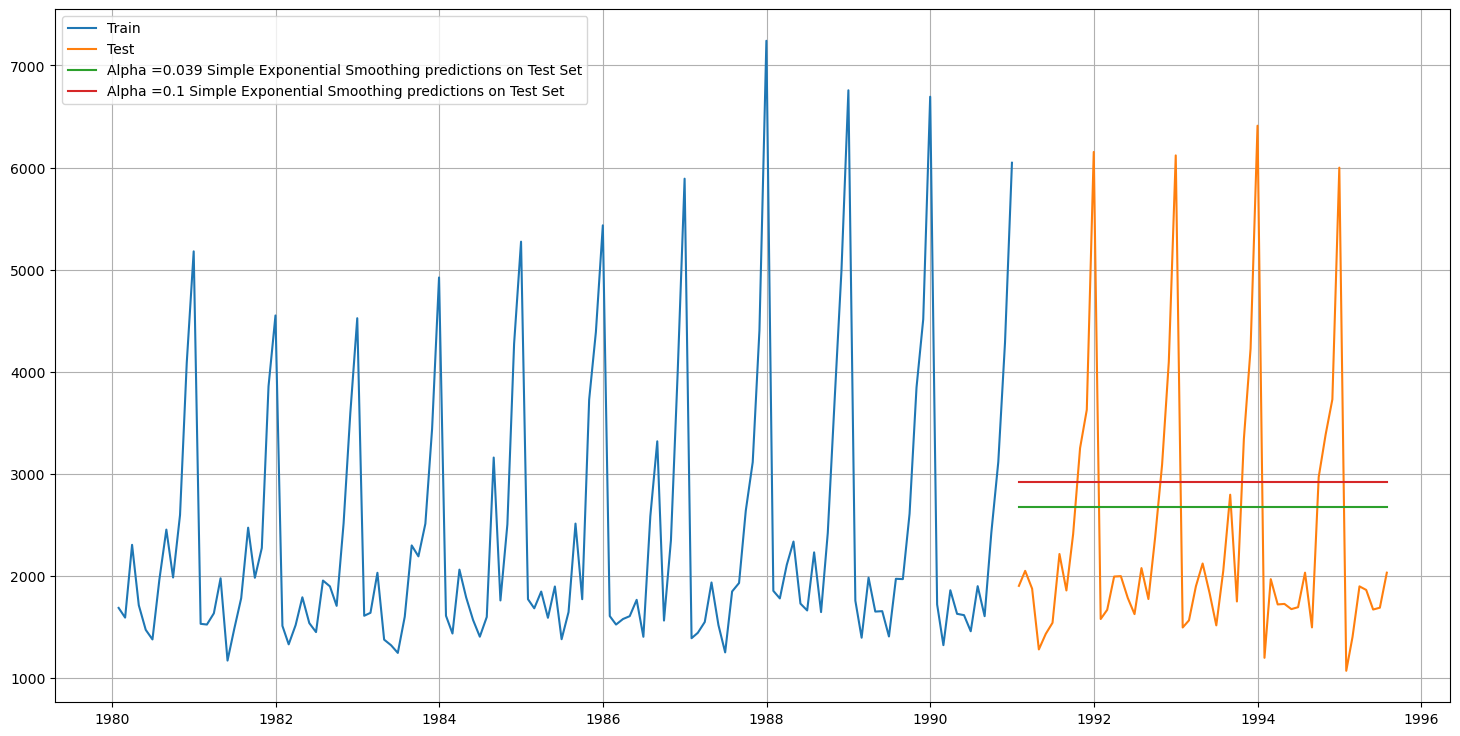

In [95]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.039 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [96]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression Model                 1389.135175
SimpleAverageModel                      1275.081804
2-point Trailing MovingAverage           813.400684
4-point Trailing MovingAverage          1156.589694
6-point Trailing MovingAverage          1283.927428
9-point Trailing MovingAverage          1346.278315
Alpha=0.039,SimpleExponentialSmoothing  1304.927405
Alpha=0.1,SimpleExponentialSmoothing    1375.393398

## Model 5: Double Exponential Smoothing (Holt's Model)

In [97]:
DES_train = train.copy()
DES_test = test.copy()

In [98]:
model_DES = Holt(DES_train['Sparkling'])

In [99]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [100]:
for i in np.arange(0.1,1.1,0.05):
    for j in np.arange(0.1,1.1,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.root_mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.root_mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j])
        
        new_row = pd.DataFrame({'Alpha Values': [i],
                                'Beta Values':[j],
                        'Train RMSE': [rmse_model6_train], 
                        'Test RMSE': [rmse_model6_test]})

        resultsDf_7 = pd.concat([resultsDf_7, new_row], ignore_index=True)

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1025853982.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [101]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0           0.10         0.10  1382.520870  1778.564670
1           0.10         0.15  1397.123148  2088.204917
20          0.15         0.10  1401.918618  2563.474303
2           0.10         0.20  1413.598835  2599.439986
3           0.10         0.25  1429.722412  3379.175512

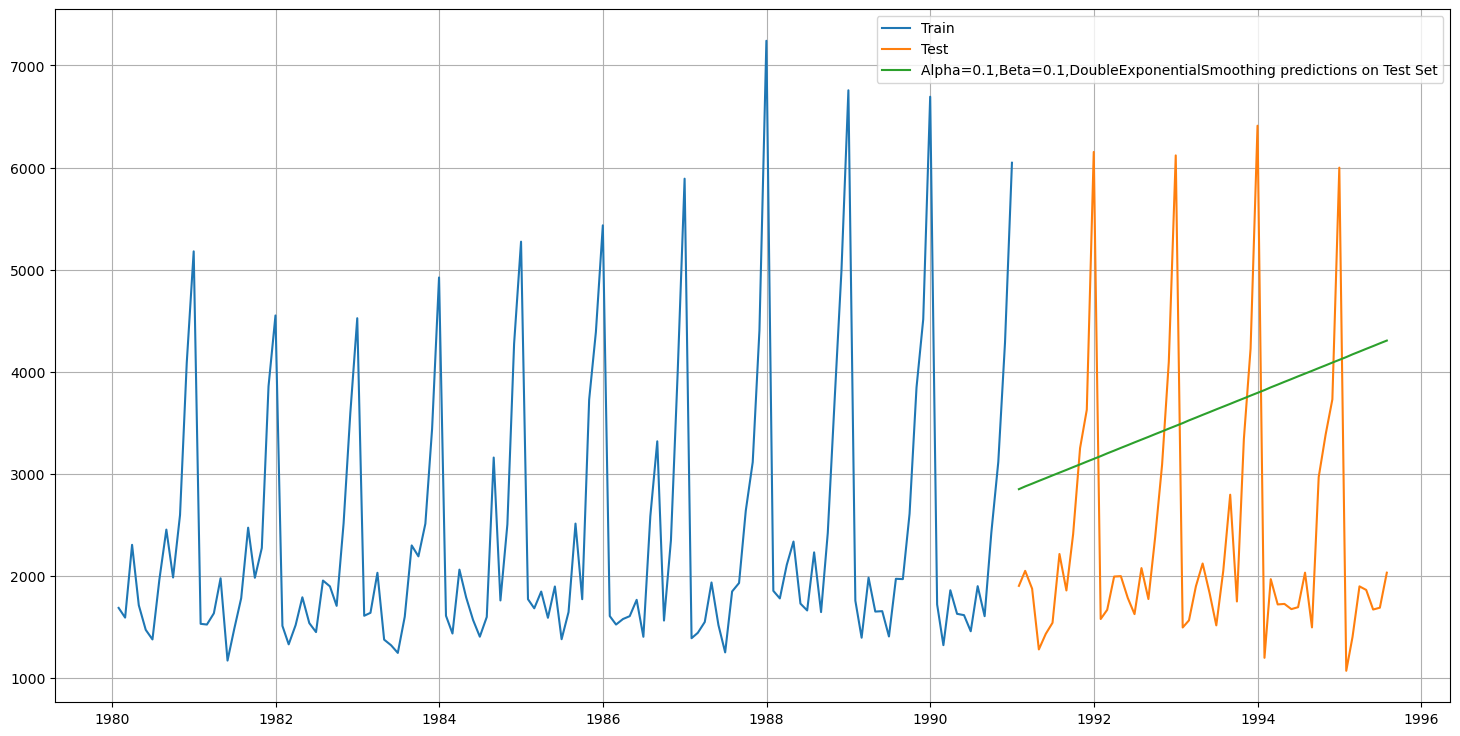

In [102]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [103]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
Linear Regression Model                        1389.135175
SimpleAverageModel                             1275.081804
2-point Trailing MovingAverage                  813.400684
4-point Trailing MovingAverage                 1156.589694
6-point Trailing MovingAverage                 1283.927428
9-point Trailing MovingAverage                 1346.278315
Alpha=0.039,SimpleExponentialSmoothing         1304.927405
Alpha=0.1,SimpleExponentialSmoothing           1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.564670

## Model 6: Triple Exponential Smoothing (Holt - Winter's Model)


In [104]:
TES_train = train.copy()
TES_test = test.copy()

In [105]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [106]:
model_TES_autofit = model_TES.fit()

In [107]:
model_TES_autofit.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [108]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
1991-01-31       1902   1587.685845
1991-02-28       2049   1356.590237
1991-03-31       1874   1763.121866
1991-04-30       1279   1656.379813
1991-05-31       1432   1542.186697

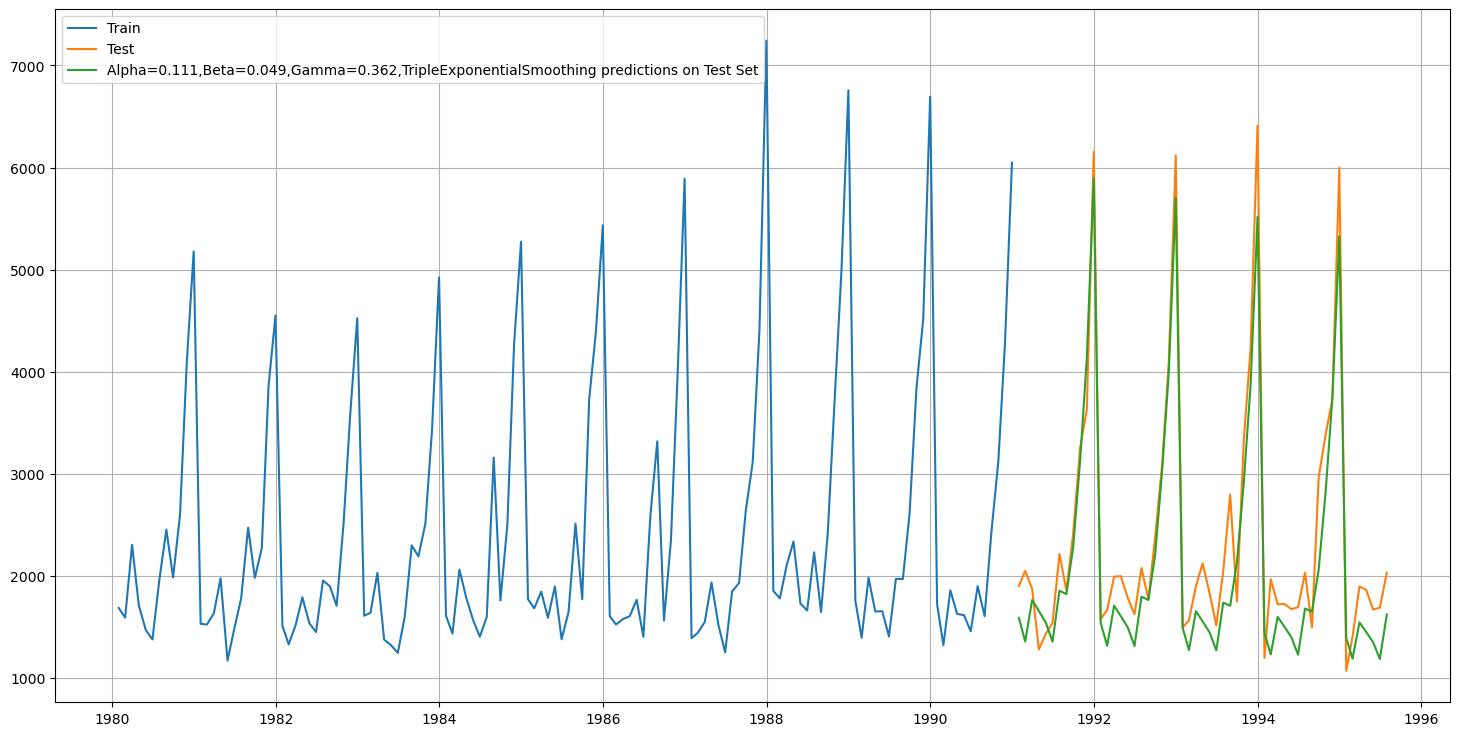

In [109]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [110]:
## Test Data

rmse_model6_test_1 = metrics.root_mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 403.706


In [111]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
Linear Regression Model                             1389.135175
SimpleAverageModel                                  1275.081804
2-point Trailing MovingAverage                       813.400684
4-point Trailing MovingAverage                      1156.589694
6-point Trailing MovingAverage                      1283.927428
9-point Trailing MovingAverage                      1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228

In [112]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [113]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.root_mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k])
            
            rmse_model8_test = metrics.root_mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k])
            
            new_row = pd.DataFrame({'Alpha Values': [i],
                                    'Beta Values':[j],
                                    'Gamma Values':k,
                                    'Train RMSE': [rmse_model8_train], 
                                    'Test RMSE': [rmse_model8_test]})

            resultsDf_8_2 = pd.concat([resultsDf_8_2, new_row], ignore_index=True)

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
C:\Users\LOKI\AppData\Local\Temp\ipykernel_8128\1975545389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

In [114]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
301           0.4          0.1           0.2  384.467709  317.434302
211           0.3          0.2           0.2  388.544148  329.037543
200           0.3          0.1           0.1  388.220071  337.080969
110           0.2          0.2           0.1  398.482510  340.186457
402           0.5          0.1           0.3  396.598057  345.913415

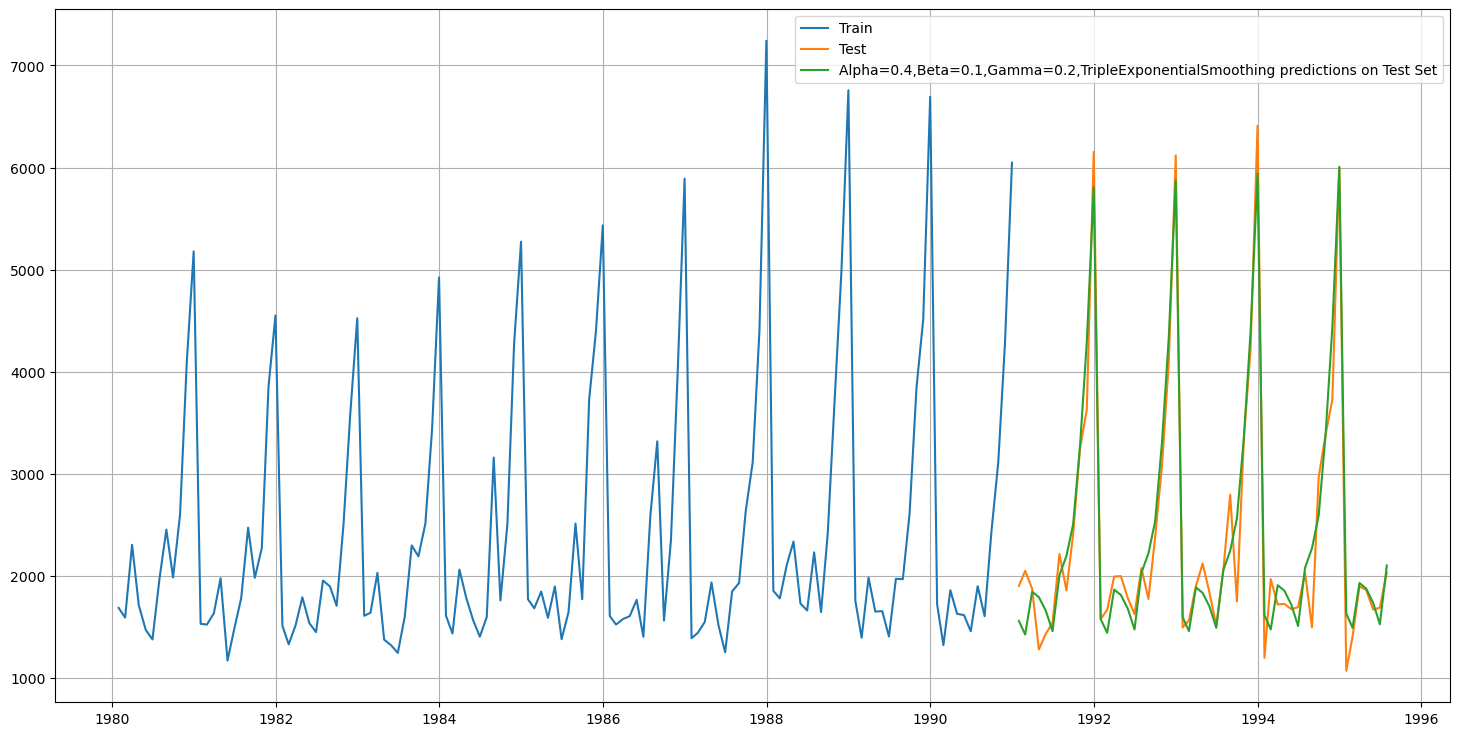

In [115]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [116]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
Linear Regression Model                             1389.135175
SimpleAverageModel                                  1275.081804
2-point Trailing MovingAverage                       813.400684
4-point Trailing MovingAverage                      1156.589694
6-point Trailing MovingAverage                      1283.927428
9-point Trailing MovingAverage                      1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302

## Evaluating the perfomance of the models

In [117]:
resultsDf.sort_values(by=["Test RMSE"])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
2-point Trailing MovingAverage                       813.400684
4-point Trailing MovingAverage                      1156.589694
SimpleAverageModel                                  1275.081804
6-point Trailing MovingAverage                      1283.927428
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
9-point Trailing MovingAverage                      1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Linear Regression Model                             1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670

### We see that the best model is the Triple Exponential Smoothing  with the parameters $\alpha$ = 0.4, $\beta$ = 0.1 and $\gamma$ = 0.2 with the test RMSE score of 317.434

## Plotting LinearRegression, Simple Average and Moving Average Predictions

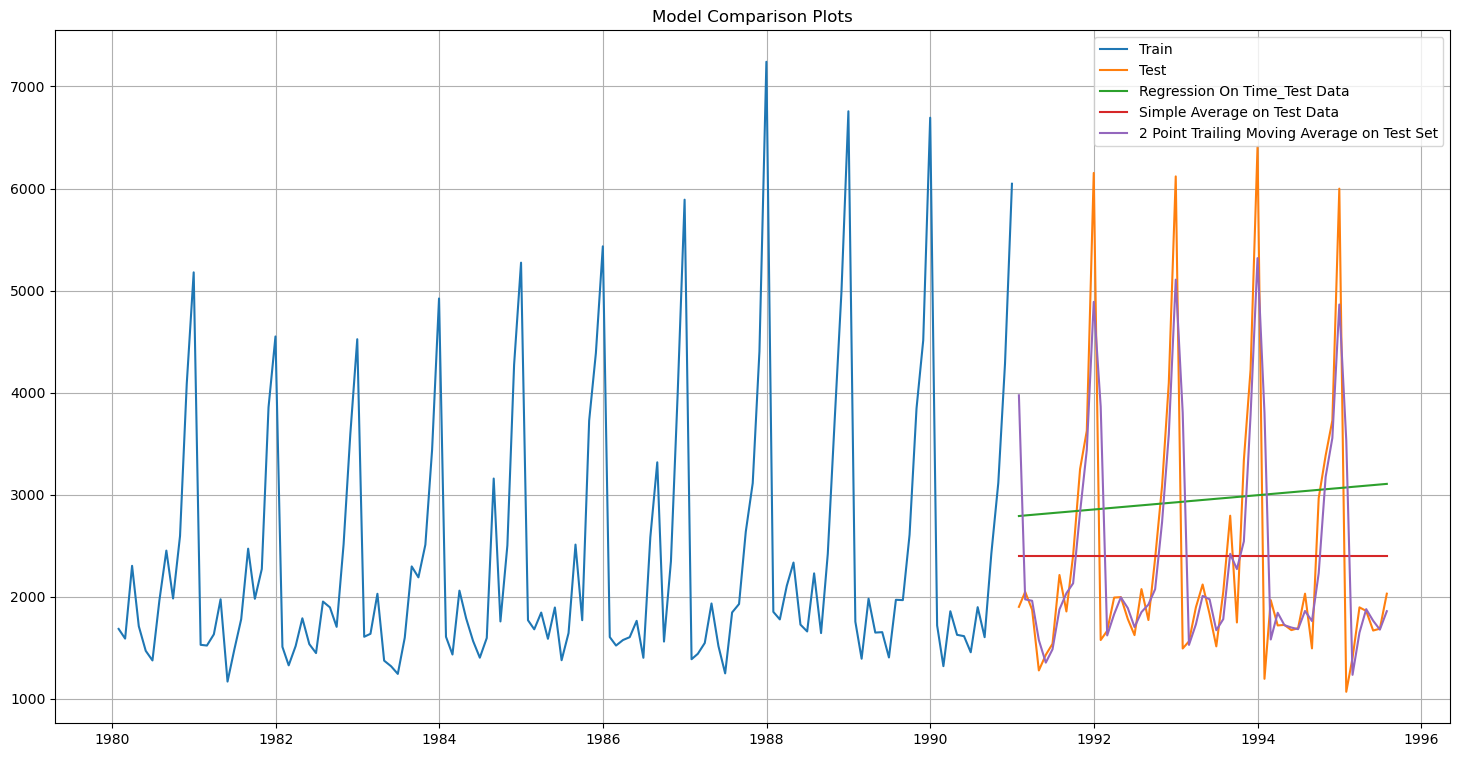

In [118]:
## Plotting on both Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Plotting Exponential Smoothing Predictions

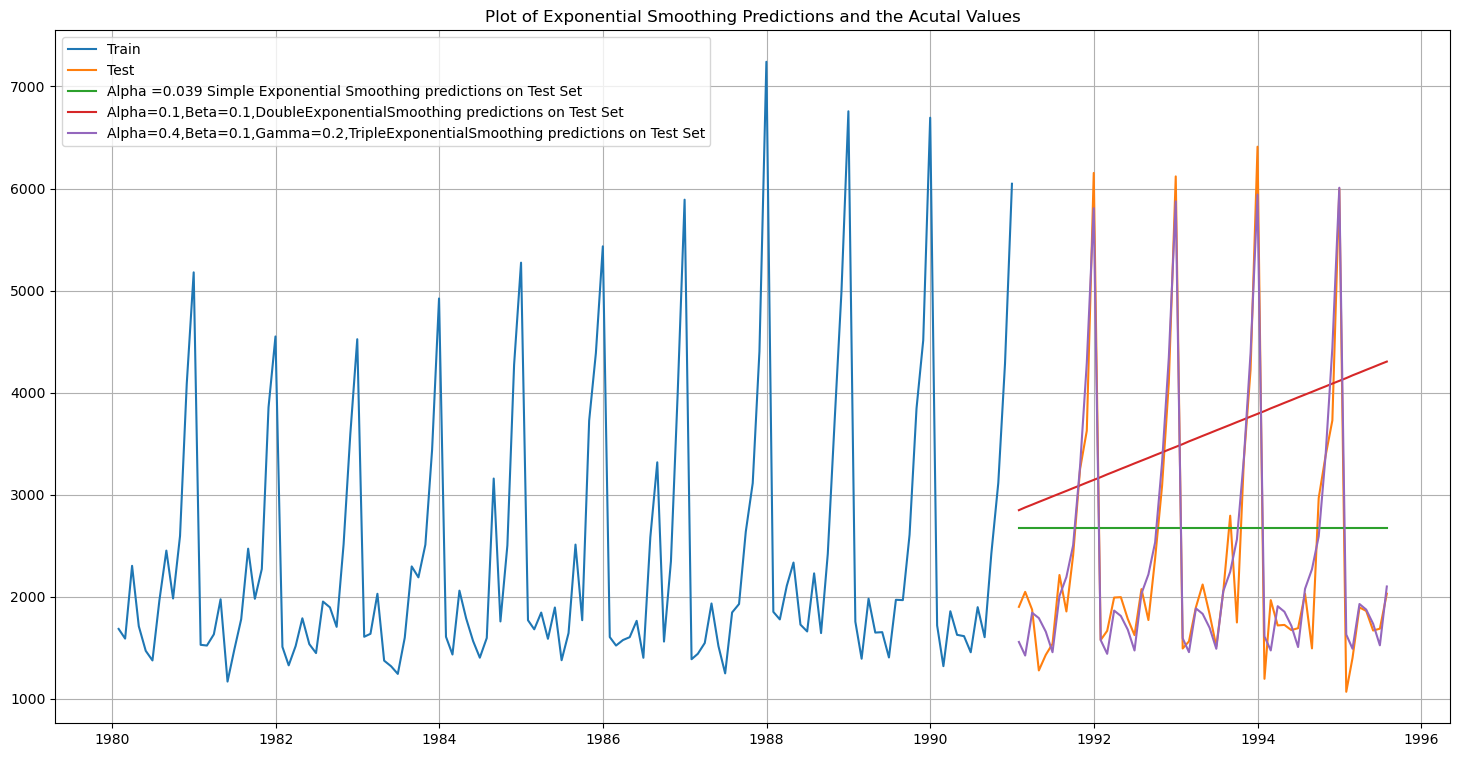

In [119]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.039 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

## Check for Stationarity

### Check for stationarity of the whole Time Series data

In [120]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

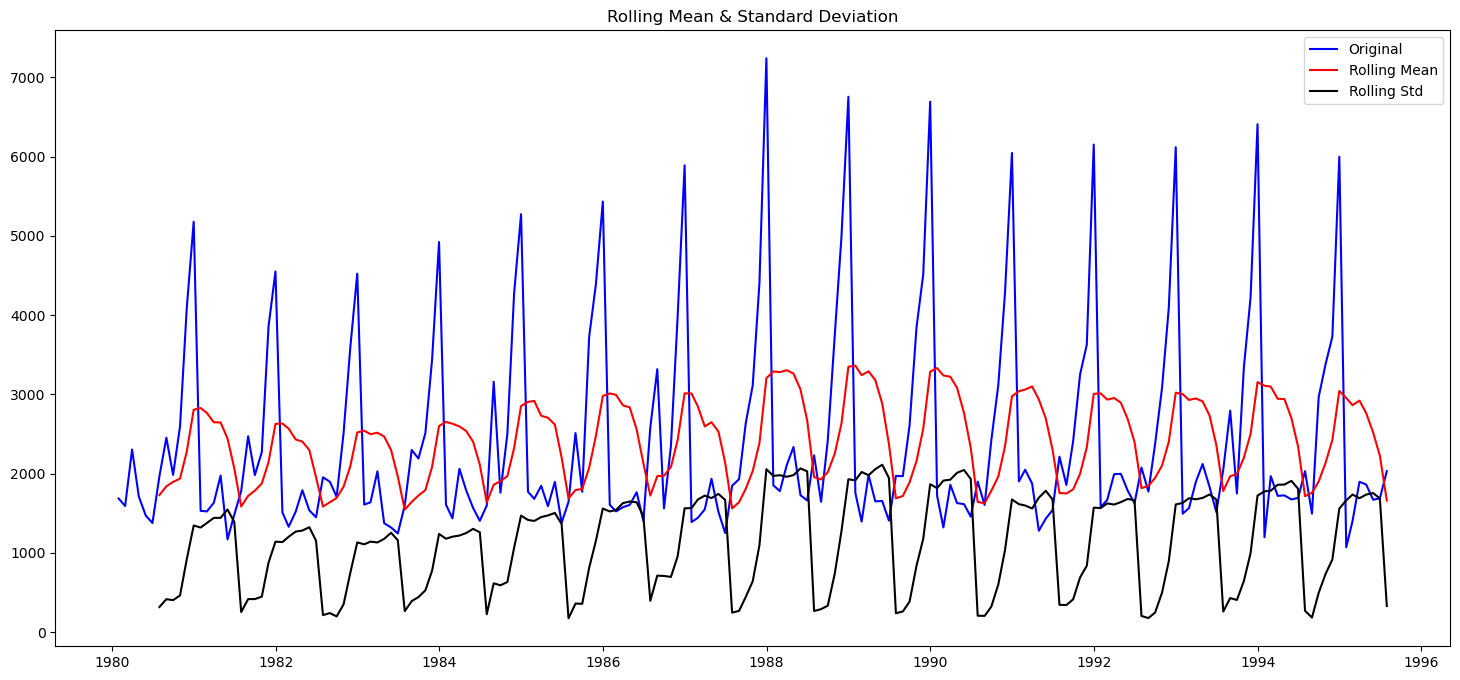

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [121]:
plt.figure(figsize=(18,8))
test_stationarity(df1['Sparkling'])

Since the p-value is 0.601, which is much greater than 0.05 at 5% significance level, the Time Series is non-stationary

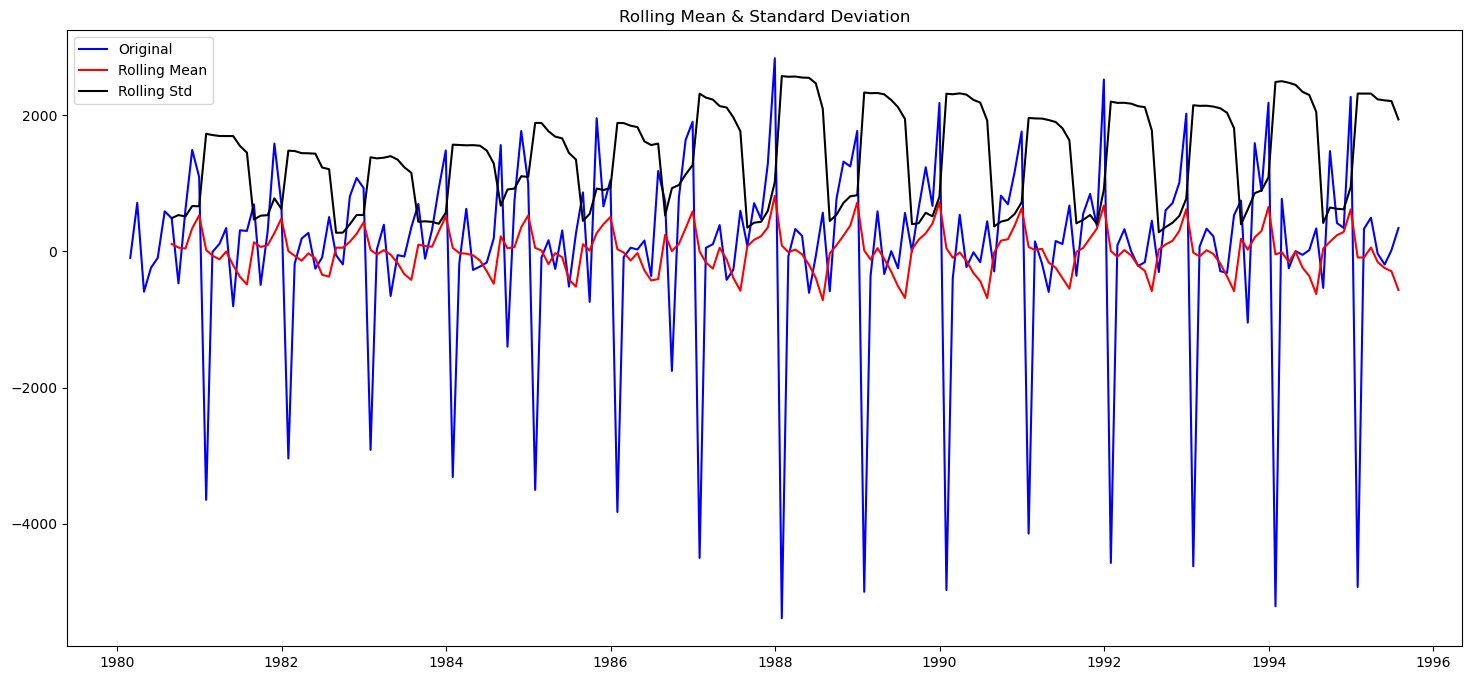

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [122]:
plt.figure(figsize=(18,8))
test_stationarity(df1['Sparkling'].diff(periods=1).dropna())

After taking a difference of order 1, we see that at $\alpha$ = 0.05,the Time Series is stationary.

### Check for stationarity of the Training data

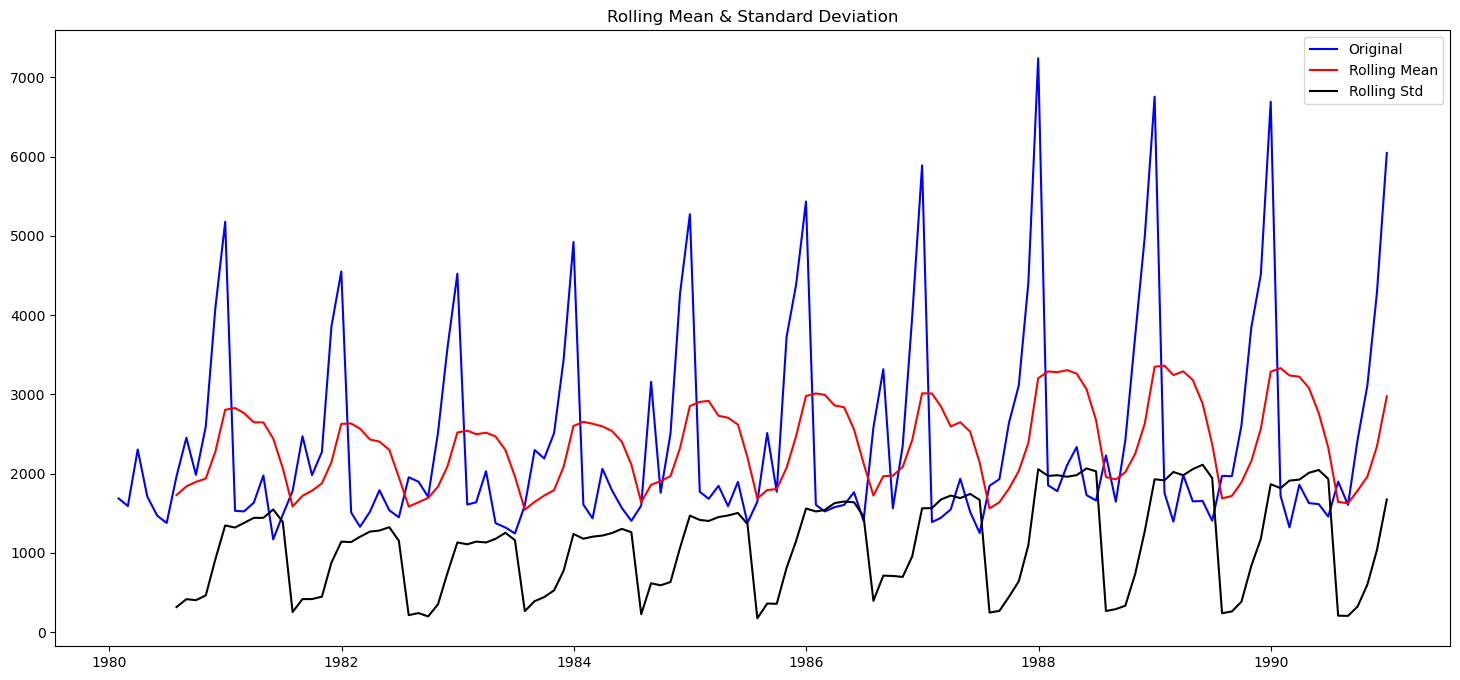

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [123]:
plt.figure(figsize=(18,8))
test_stationarity(train['Sparkling'])

Since the p-value is 0.66, which is much greater than 0.05 at 5% significance level, the Time Series is non-stationary

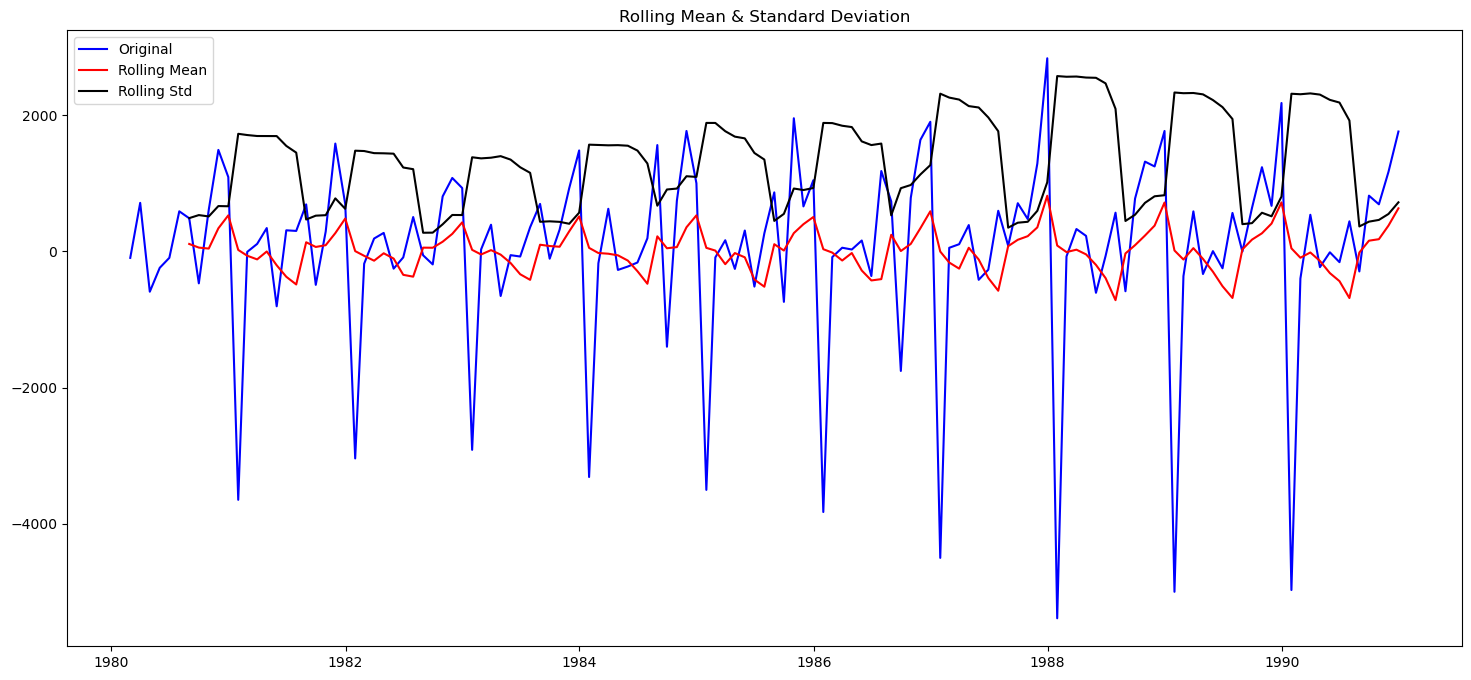

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [124]:
plt.figure(figsize=(18,8))
test_stationarity(train['Sparkling'].diff(periods=1).dropna())

After taking a difference of order 1, we see that at $\alpha$ = 0.05, the Time Series is stationary.

# Model Building - Stationary Data

## Plotting ACF and PACF plots on the whole Time series data (Stationary).

In [125]:
plt.rcParams["figure.figsize"] = (9, 6)

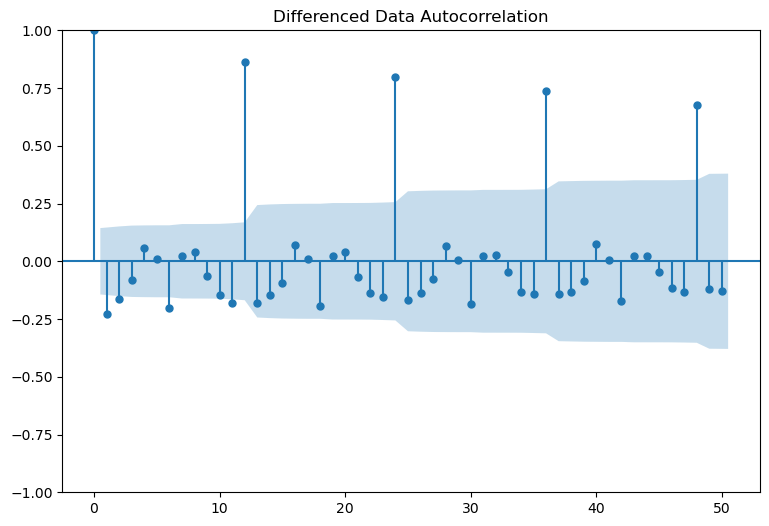

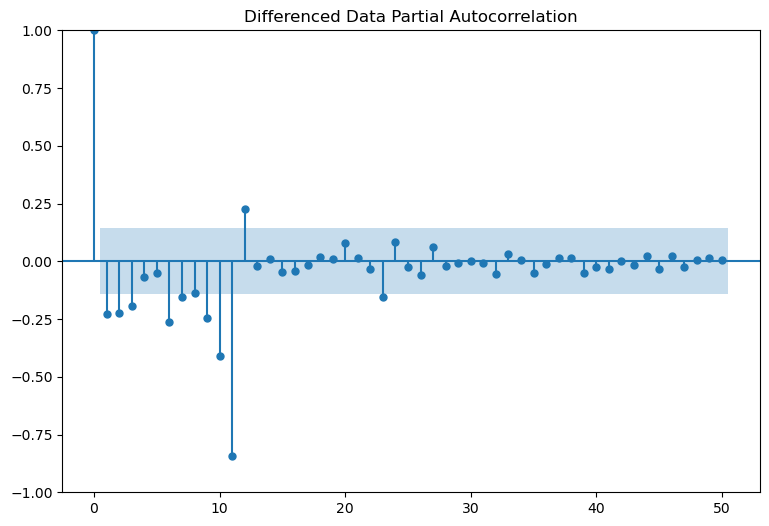

In [126]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Plotting ACF and PACF plots on the training data(stationary).

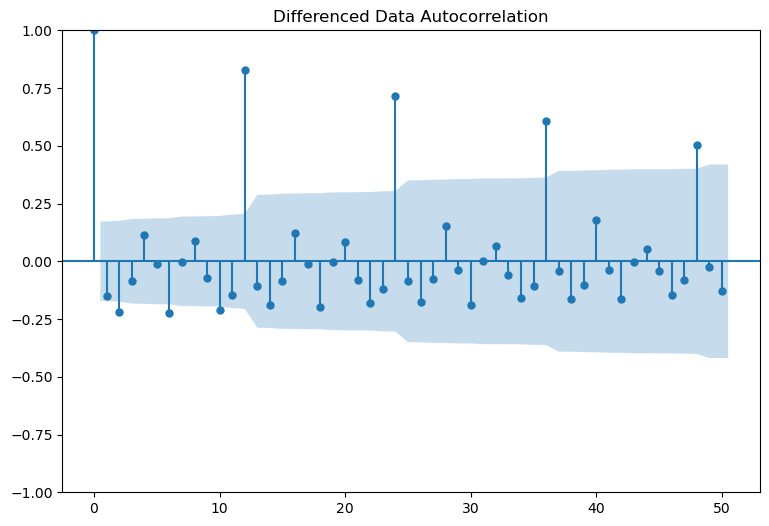

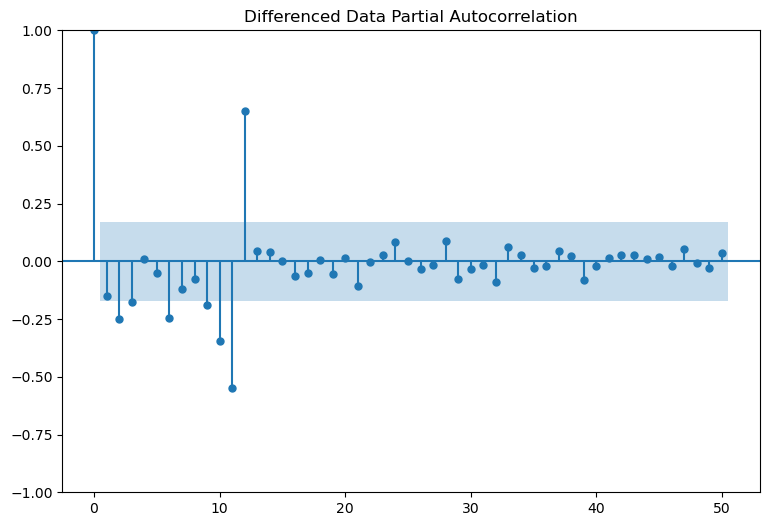

In [127]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### AR , MA values

- By observing the PACF plot, the Auto-regressive (AR) parameter p value is taken as 0.
- By observing the ACF plot, the Moving-Average (MA) parameter q value is taken as 0.
- By using these values, we can set a range and iterate with different values for manual ARIMA and SARIMA models.


## Model 1 - Auto ARIMA

In [128]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [129]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [130]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame([{'param': param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.408323125097
ARIMA(1, 1, 0) - AIC:2266.6085393190097


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:2235.7550946605334
ARIMA(1, 1, 2) - AIC:2234.5272004520675
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262639018
ARIMA(2, 1, 2) - AIC:2213.509212375905


In [131]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509212
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [132]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 16 Mar 2025   AIC                           2213.509
Time:                        18:33:33   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

### Model Evaluation

In [133]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [134]:
rmse = metrics.root_mean_squared_error(test['Sparkling'],predicted_auto_ARIMA)
print("RMSE:",rmse)

RMSE: 1299.980107147282


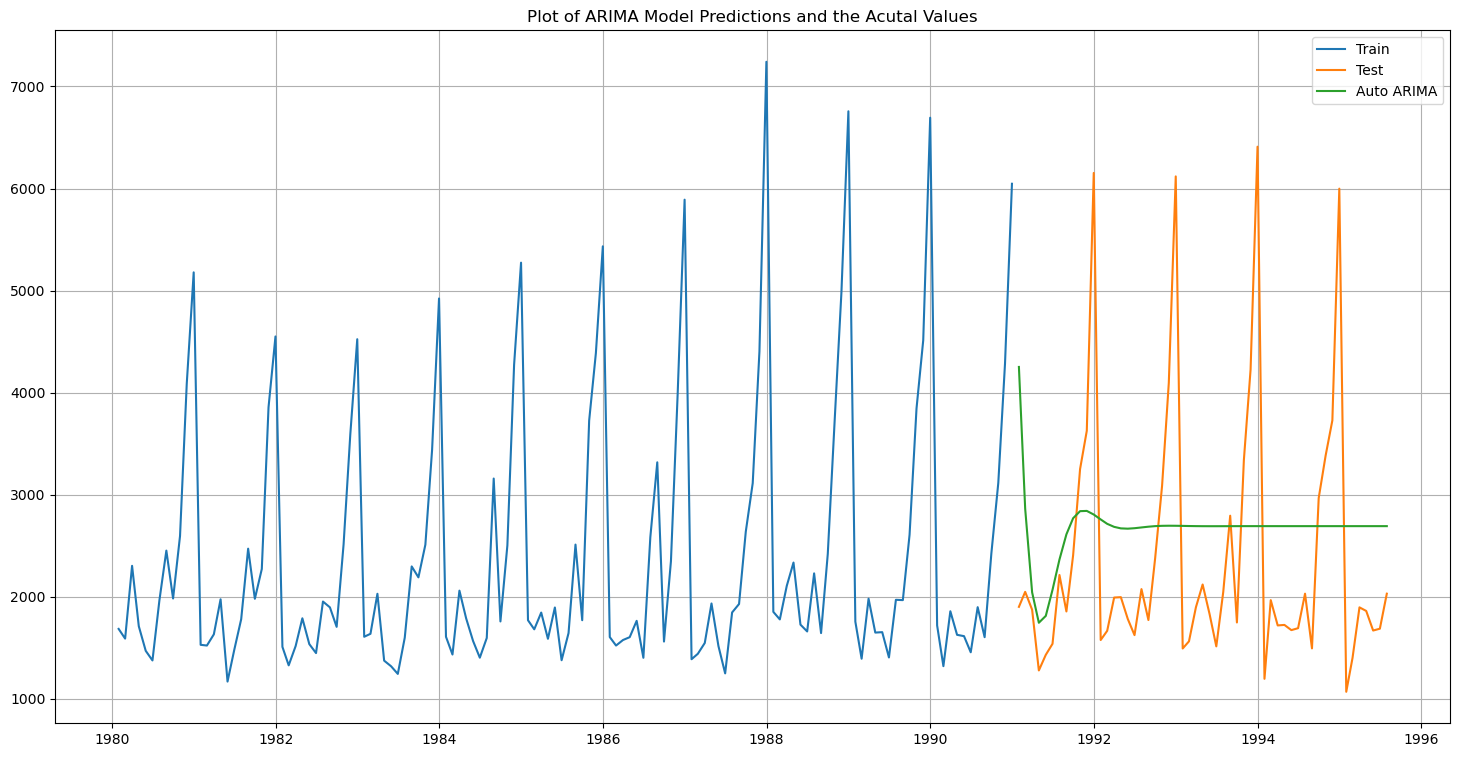

In [135]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_auto_ARIMA, label="Auto ARIMA")


plt.legend(loc='best')
plt.grid();
plt.title('Plot of ARIMA Model Predictions and the Acutal Values');

In [136]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

Test RMSE
Linear Regression Model                             1389.135175
SimpleAverageModel                                  1275.081804
2-point Trailing MovingAverage                       813.400684
4-point Trailing MovingAverage                      1156.589694
6-point Trailing MovingAverage                      1283.927428
9-point Trailing MovingAverage                      1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto ARIMA(2,1,2)                                   1299.980107

## Model 2 - Manual ARIMA

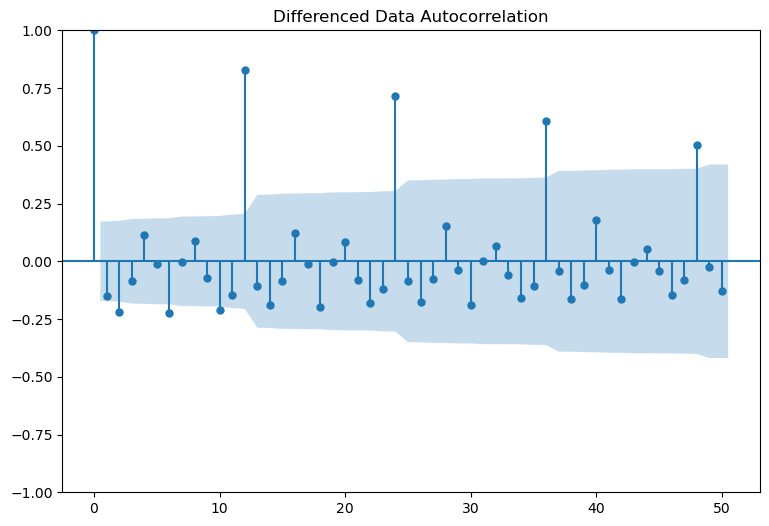

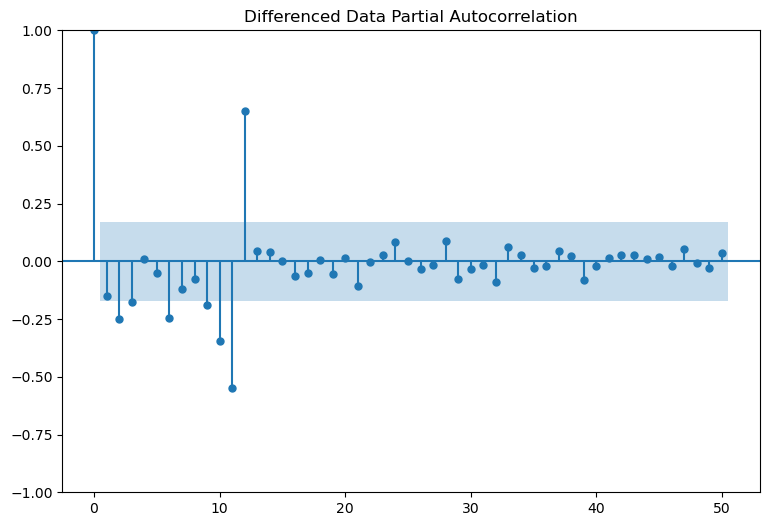

In [137]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From PACF plot, p values can be selected from a range of 1-4

From ACF plot, q values can be selected from a range of 1-4

d = 1 (Data is made stationary after differencing of order 1)

In [138]:
import itertools
p = range(1, 5)
q = range(1, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [139]:
# Creating an empty Dataframe with column names only
MANUAL_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
MANUAL_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [140]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    MANUAL_ARIMA_AIC = pd.concat([MANUAL_ARIMA_AIC, pd.DataFrame([{'param': param, 'AIC': ARIMA_model.aic}])], ignore_index=True)

C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:2235.7550946605334
ARIMA(1, 1, 2) - AIC:2234.5272004520675
ARIMA(1, 1, 3) - AIC:2235.607812285269
ARIMA(1, 1, 4) - AIC:2227.736977039347
ARIMA(2, 1, 1) - AIC:2233.7776262639018
ARIMA(2, 1, 2) - AIC:2213.509212375905


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.943689424644
ARIMA(2, 1, 4) - AIC:2222.921832338957
ARIMA(3, 1, 1) - AIC:2235.4989288389197


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.802737810126


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 1, 3) - AIC:2221.452961378608


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) - AIC:2219.8982753550545
ARIMA(4, 1, 1) - AIC:2237.073057950133


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2) - AIC:2233.047330187207
ARIMA(4, 1, 3) - AIC:2222.904099434997
ARIMA(4, 1, 4) - AIC:2214.438515541933


C:\Users\LOKI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [141]:
MANUAL_ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
5   (2, 1, 2)  2213.509212
15  (4, 1, 4)  2214.438516
11  (3, 1, 4)  2219.898275
10  (3, 1, 3)  2221.452961
14  (4, 1, 3)  2222.904099
7   (2, 1, 4)  2222.921832
3   (1, 1, 4)  2227.736977
9   (3, 1, 2)  2230.802738
6   (2, 1, 3)  2232.943689
13  (4, 1, 2)  2233.047330
4   (2, 1, 1)  2233.777626
1   (1, 1, 2)  2234.527200
8   (3, 1, 1)  2235.498929
2   (1, 1, 3)  2235.607812
0   (1, 1, 1)  2235.755095
12  (4, 1, 1)  2237.073058

In [142]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 16 Mar 2025   AIC                           2213.509
Time:                        18:33:43   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

### Model Evaluation

In [143]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [144]:
rmse = metrics.root_mean_squared_error(test['Sparkling'],predicted_manual_ARIMA)
print("RMSE:",rmse)

RMSE: 1299.980107147282


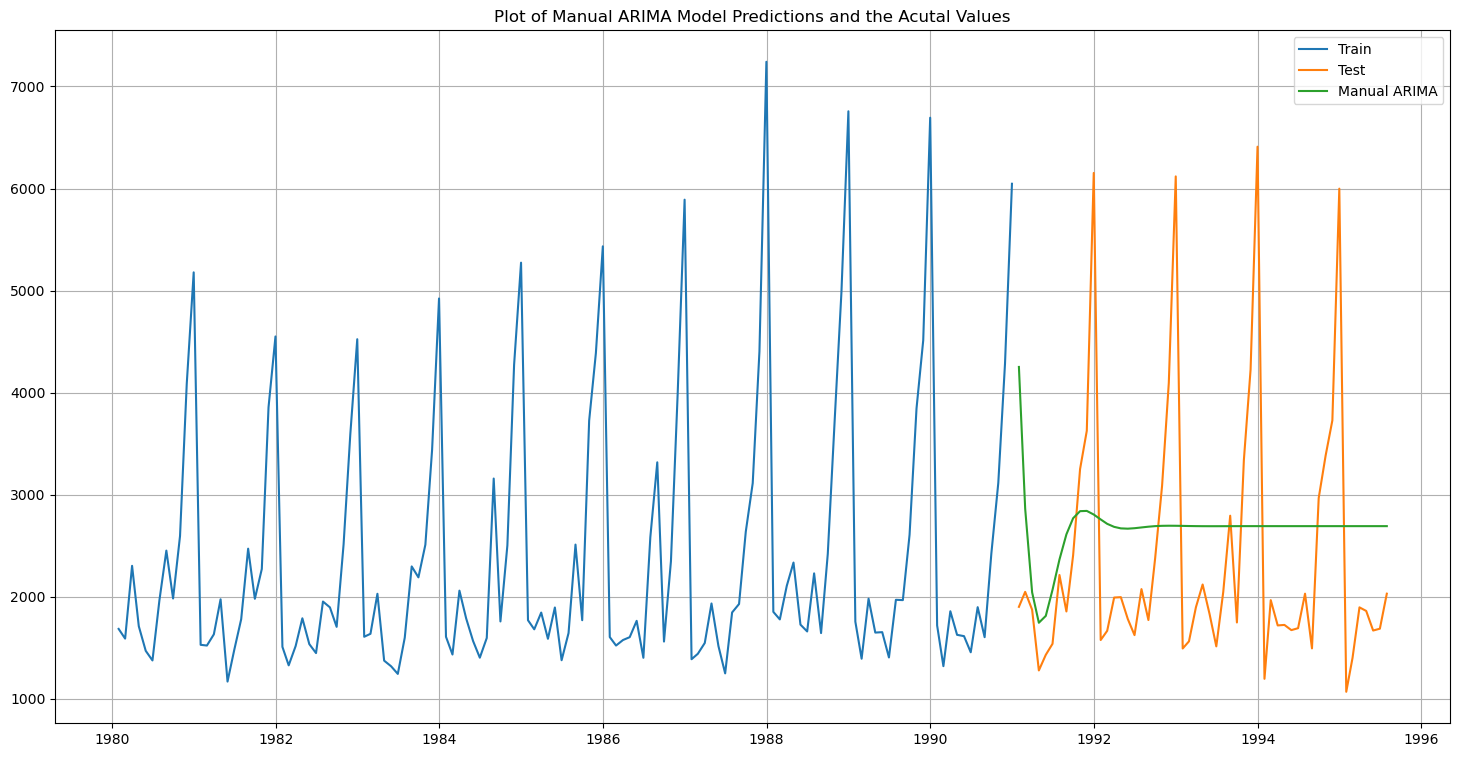

In [145]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_ARIMA, label="Manual ARIMA")


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA Model Predictions and the Acutal Values');

In [146]:
temp_results_manual_arima = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_results_manual_arima])
resultsDf

Test RMSE
Linear Regression Model                             1389.135175
SimpleAverageModel                                  1275.081804
2-point Trailing MovingAverage                       813.400684
4-point Trailing MovingAverage                      1156.589694
6-point Trailing MovingAverage                      1283.927428
9-point Trailing MovingAverage                      1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto ARIMA(2,1,2)                                   1299.980107
Manual ARIMA(2,1,2)                                 1299.980107

## Model 3 - Auto SARIMA

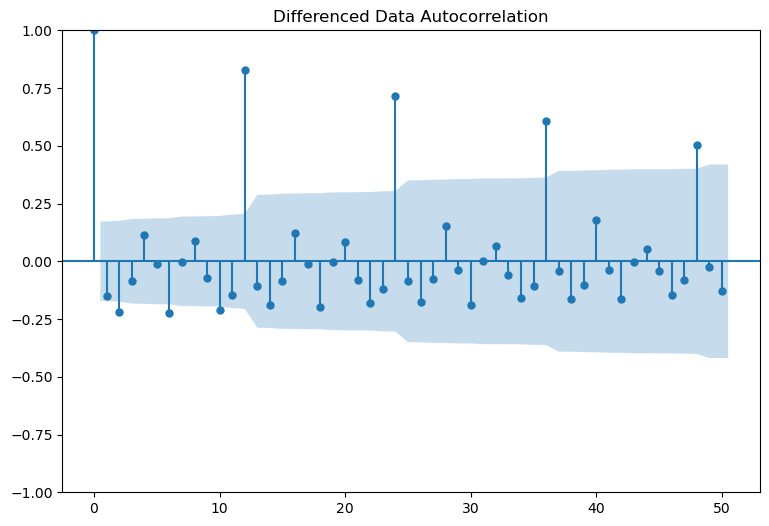

In [147]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [148]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [149]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [150]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame([{'param': param, 'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}])], ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844185
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640233795
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389606
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791621
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158613735
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920774
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566373
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572716893
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183827
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193765641
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509143412734
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417545
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085158108
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824679256
SARIMA(0, 1, 

In [153]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [154]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 16 Mar 2025   AIC                           1555.584
Time:                                    18:35:07   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

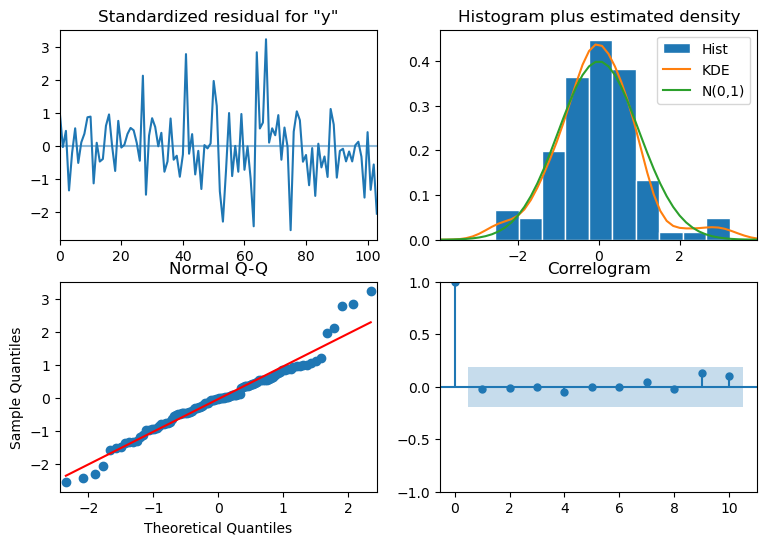

In [155]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

### Model Predictions

In [156]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [157]:
predicted_auto_SARIMA.predicted_mean

array([1327.41380662, 1315.13767574, 1621.6219073 , 1598.8923786 ,
       1392.71797067, 1224.83550451, 1780.46903998, 1787.92088805,
       2192.54789082, 3184.33777218, 4490.69005496, 6525.081762  ,
       1307.2942372 , 1172.80513194, 1572.19590628, 1504.48326525,
       1306.84165529, 1095.98733544, 1717.03955482, 1784.66659714,
       2126.3692784 , 3224.73428403, 4587.17286668, 6765.82230253,
       1251.61212703, 1074.73214214, 1514.56962849, 1429.48853254,
       1232.21706513, 1006.42933803, 1658.30344015, 1726.65692298,
       2084.7624433 , 3230.44297118, 4653.22524717, 6927.13198941,
       1171.15952273,  986.37980591, 1445.60526149, 1356.73621457,
       1150.84195242,  915.12449569, 1595.61841222, 1666.96301222,
       2040.78867724, 3236.74205165, 4721.96273079, 7095.65457028,
       1087.09216298,  894.20319264, 1373.58127903, 1280.81216477,
       1065.88272236,  819.82113715, 1530.1773878 ])

In [158]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.413807  388.341544     566.278367    2088.549247
1  1315.137676  402.004323     527.223681    2103.051670
2  1621.621907  401.997923     833.720455    2409.523359
3  1598.892379  407.235001     800.726443    2397.058314
4  1392.717971  407.964999     593.121266    2192.314675

In [159]:
rmse = metrics.root_mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print(rmse)

528.5868983820691


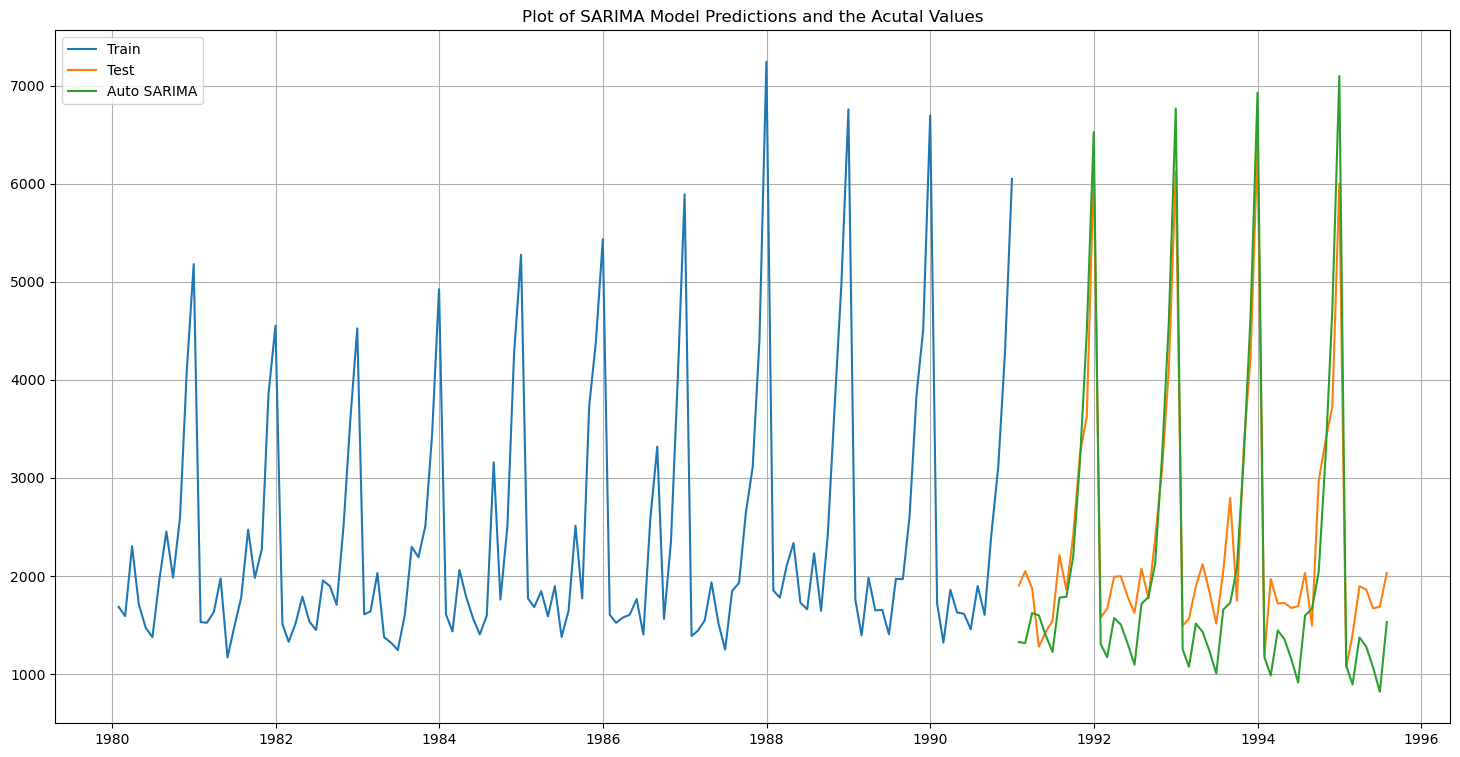

In [160]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test.index,predicted_auto_SARIMA.predicted_mean, label="Auto SARIMA")


plt.legend(loc='best')
plt.grid();
plt.title('Plot of SARIMA Model Predictions and the Acutal Values');

In [161]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Linear Regression Model                             1389.135175
SimpleAverageModel                                  1275.081804
2-point Trailing MovingAverage                       813.400684
4-point Trailing MovingAverage                      1156.589694
6-point Trailing MovingAverage                      1283.927428
9-point Trailing MovingAverage                      1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto ARIMA(2,1,2)                                   1299.980107
Manual ARIMA(2,1,2)                                 1299.980107
Auto SARIMA(1,1,2)(1,0,2,12)                         528.586898

## Model 4 - Manual SARIMA

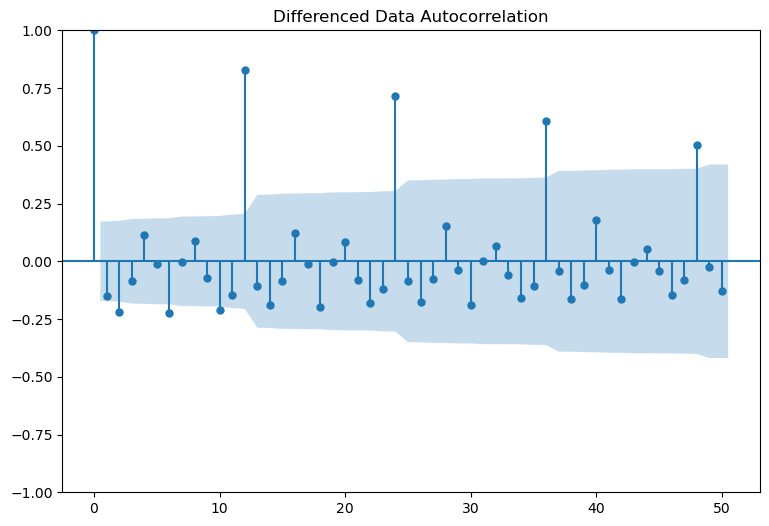

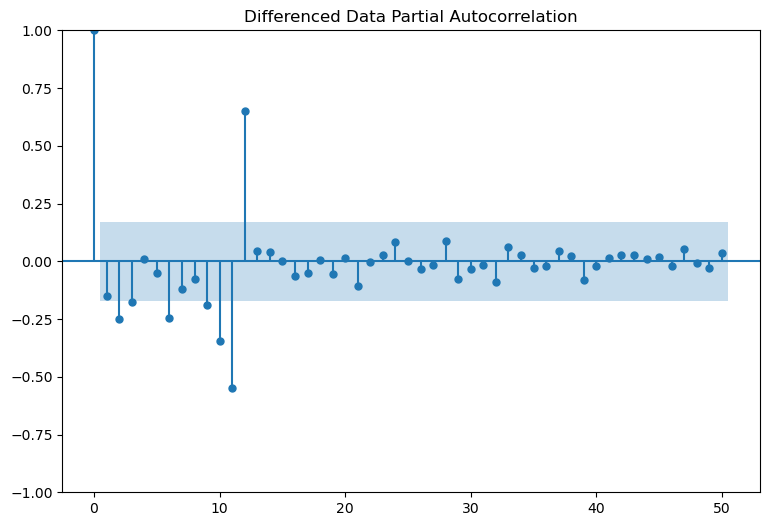

In [162]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From PACF plot, p values can be selected from a range of 0-4

From ACF plot, q values can be selected from a range of 0-4

d = 1 (Data is made stationary after differencing of order 1)

D = 1 (Since there are strong seasonal patterns in ACF, seasonal differencing can be done)

In [163]:
import itertools
p = range(0, 3)
q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [164]:
MANUAL_SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
MANUAL_SARIMA_AIC


Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [165]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_mSARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_mSARIMA.aic))
        MANUAL_SARIMA_AIC = pd.concat([MANUAL_SARIMA_AIC, pd.DataFrame([{'param': param, 'seasonal':param_seasonal ,'AIC': results_mSARIMA.aic}])], ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334678524
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574255924
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908185045
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621306965
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866601
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.9911553660606
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719828463
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234229954
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846679862
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.8594819023835
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.8550259196334
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.670952413685
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.2448811088411
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.6168027963472
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1402.638588851219
SARIMA(0, 1, 

In [166]:
MANUAL_SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
47  (1, 1, 2)  (0, 1, 2, 12)  1382.347780
20  (0, 1, 2)  (0, 1, 2, 12)  1382.484254
50  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
74  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
23  (0, 1, 2)  (1, 1, 2, 12)  1384.398867

In [167]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sun, 16 Mar 2025   AIC                           1382.348
Time:                                    18:35:52   BIC                           1397.479
Sample:                                         0   HQIC                          1388.455
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

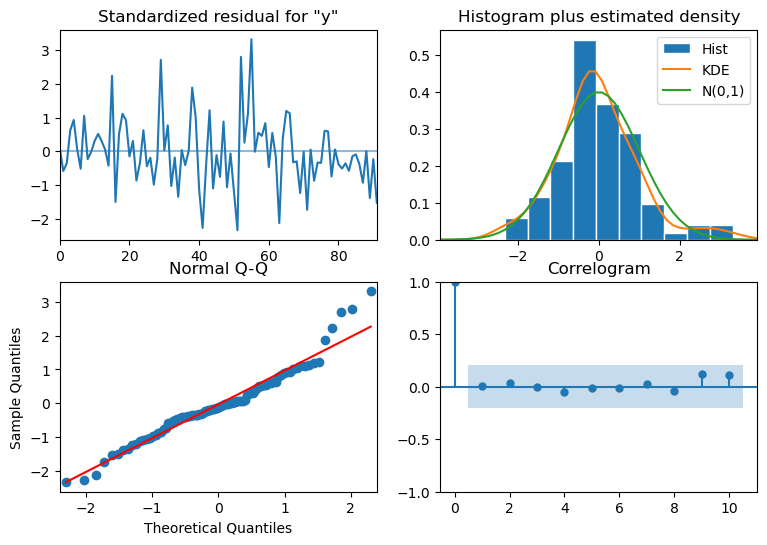

In [168]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

### Model Predictions

In [169]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [170]:
predicted_manual_SARIMA.predicted_mean

array([1460.24463199, 1392.43715972, 1743.20170055, 1650.06692444,
       1522.65602506, 1365.34219119, 1854.39912711, 1664.79782528,
       2343.55429049, 3223.02197506, 4306.22504023, 6199.41813127,
       1469.4908055 , 1302.52926903, 1707.87037559, 1586.39065103,
       1472.25064333, 1303.70588952, 1801.97609081, 1616.35566631,
       2288.01961941, 3179.40060193, 4256.18087725, 6158.41559507,
       1418.87073373, 1244.81717275, 1654.06366953, 1530.43334992,
       1417.477618  , 1248.28071486, 1746.91003753, 1561.09185438,
       2232.86470794, 3124.18572186, 4200.9990203 , 6103.21555317,
       1363.6807058 , 1189.62163038, 1598.87116381, 1475.239172  ,
       1362.28436093, 1193.0869507 , 1691.71655261, 1505.89821569,
       2177.67115392, 3068.99212122, 4145.80544534, 6048.02196406,
       1308.48712448, 1134.42804478, 1543.67758057, 1420.04558746,
       1307.0907771 , 1137.89336648, 1636.5229686 ])

In [171]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1460.244632  412.922780     650.930855    2269.558409
1  1392.437160  429.721311     550.198866    2234.675453
2  1743.201701  430.065877     900.288072    2586.115329
3  1650.066924  433.930038     799.579678    2500.554171
4  1522.656025  434.242925     671.555532    2373.756518

In [172]:
rmse = metrics.root_mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print(rmse)

382.5767267773126


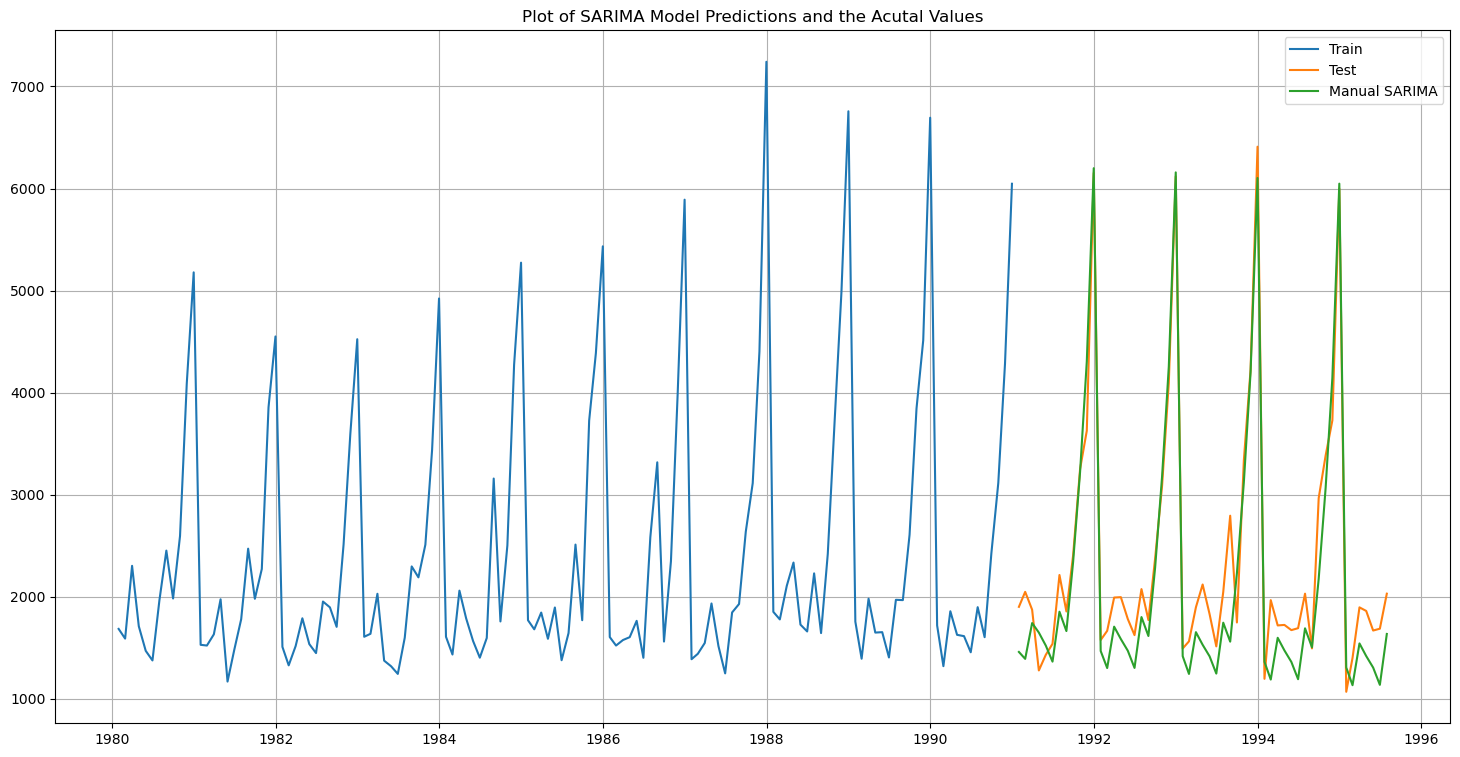

In [173]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test.index,predicted_manual_SARIMA.predicted_mean, label="Manual SARIMA")


plt.legend(loc='best')
plt.grid();
plt.title('Plot of SARIMA Model Predictions and the Acutal Values');

In [174]:
temp_results_ManualSARIMA = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(1,1,2)(0,1,2,12)'])

In [175]:
resultsDf = pd.concat([resultsDf,temp_results_ManualSARIMA])
resultsDf

Test RMSE
Linear Regression Model                             1389.135175
SimpleAverageModel                                  1275.081804
2-point Trailing MovingAverage                       813.400684
4-point Trailing MovingAverage                      1156.589694
6-point Trailing MovingAverage                      1283.927428
9-point Trailing MovingAverage                      1346.278315
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto ARIMA(2,1,2)                                   1299.980107
Manual ARIMA(2,1,2)                                 1299.980107
Auto SARIMA(1,1,2)(1,0,2,12)                         528.586898
Manual SARIMA(1,1,2)(0,1,2,12)                       382.576727

## Plotting the ARIMA and SARIMA models

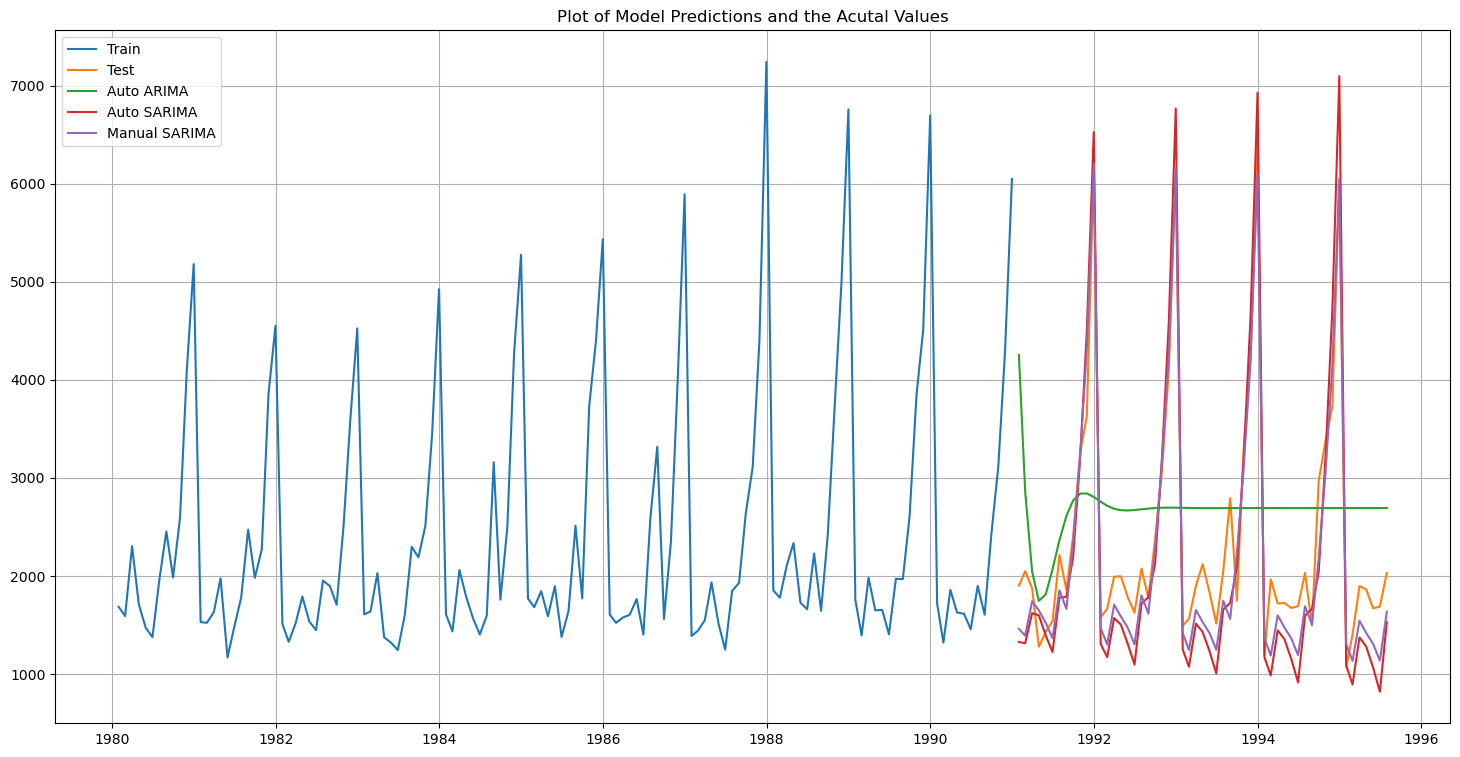

In [176]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_auto_ARIMA, label="Auto ARIMA")
plt.plot(test.index,predicted_auto_SARIMA.predicted_mean, label="Auto SARIMA")

plt.plot(test.index,predicted_manual_SARIMA.predicted_mean, label="Manual SARIMA")

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Model Predictions and the Acutal Values');

## Evaluating the perfomance of all models

In [177]:
resultsDf.sort_values(by=["Test RMSE"])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Manual SARIMA(1,1,2)(0,1,2,12)                       382.576727
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Auto SARIMA(1,1,2)(1,0,2,12)                         528.586898
2-point Trailing MovingAverage                       813.400684
4-point Trailing MovingAverage                      1156.589694
SimpleAverageModel                                  1275.081804
6-point Trailing MovingAverage                      1283.927428
Auto ARIMA(2,1,2)                                   1299.980107
Manual ARIMA(2,1,2)                                 1299.980107
Alpha=0.039,SimpleExponentialSmoothing              1304.927405
9-point Trailing MovingAverage                      1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Linear Regression Model                             1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670

### We see that the best model is the Triple Exponential Smoothing  with the parameters $\alpha$ = 0.4, $\beta$ = 0.1 and $\gamma$ = 0.2 with the test RMSE score of 317.434

### Rebuilding the best model using the entire data

In [178]:
final_model =  ExponentialSmoothing(df1['Sparkling'],
                                        trend='additive',
                                        seasonal='multiplicative',
                                        freq='M').fit(smoothing_level=0.4,
                                                      smoothing_trend=0.1,
                                                      smoothing_seasonal=0.2,
                                                      optimized=False,use_brute=True)

In [179]:
final_model.params

{'smoothing_level': 0.4,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.2,
 'damping_trend': nan,
 'initial_level': 2356.541666666666,
 'initial_trend': -9.181060606060441,
 'initial_seasons': array([0.71166877, 0.67309316, 0.81943184, 0.78429538, 0.63424785,
        0.63175794, 0.82647725, 1.0318111 , 0.89263071, 1.1231428 ,
        1.69872589, 2.17271729]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [180]:
RMSE_final_model = metrics.root_mean_squared_error(df1['Sparkling'],final_model.fittedvalues)

print('RMSE:',RMSE_final_model)

RMSE: 386.4214825047286


In [181]:
final_prediction = final_model.forecast(steps=12)

In [182]:
final_prediction

1995-08-31    2088.425429
1995-09-30    2614.039802
1995-10-31    3457.976195
1995-11-30    4330.695877
1995-12-31    6595.144301
1996-01-31    1550.768494
1996-02-29    1832.282175
1996-03-31    2074.922505
1996-04-30    2002.415693
1996-05-31    1821.629000
1996-06-30    1708.486723
1996-07-31    2190.179438
Freq: M, dtype: float64

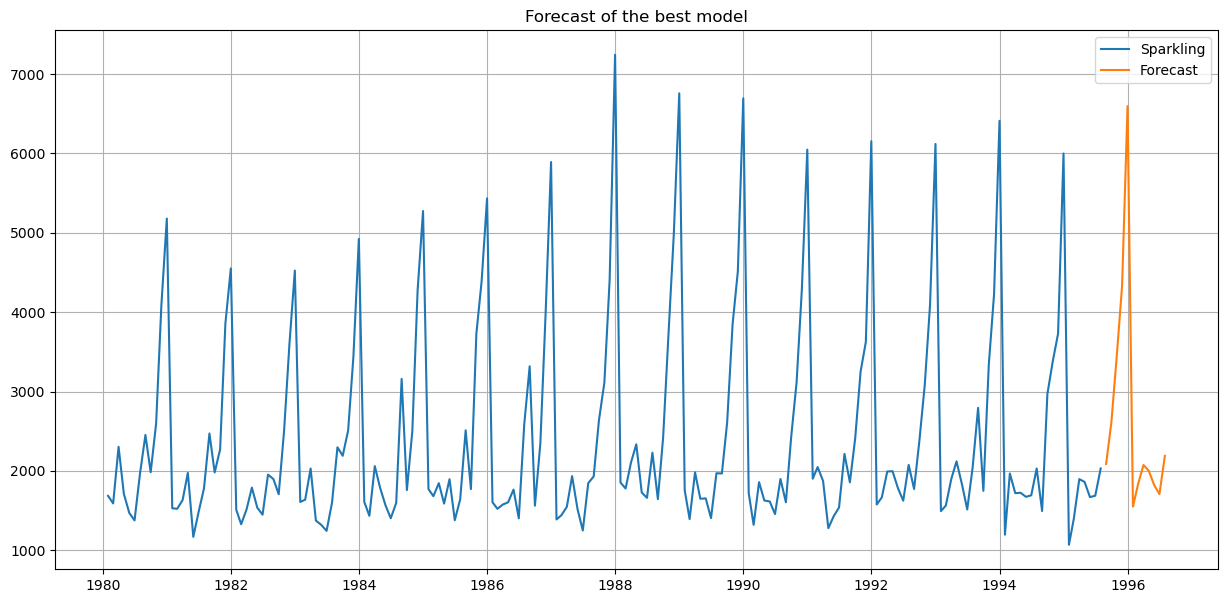

In [183]:
plt.figure(figsize=(15,7))
plt.plot(df1['Sparkling'], label='Sparkling')
plt.plot(final_prediction, label="Forecast")

plt.legend(loc='best')
plt.grid();
plt.title("Forecast of the best model");

In [184]:
fpred_df = pd.DataFrame({'lower_CI':final_prediction - 1.96*np.std(final_model.resid,ddof=1),
                          'prediction':final_prediction,
                          'upper_ci': final_prediction + 1.96*np.std(final_model.resid,ddof=1)})
fpred_df.head()

lower_CI   prediction     upper_ci
1995-08-31  1329.842420  2088.425429  2847.008439
1995-09-30  1855.456792  2614.039802  3372.622811
1995-10-31  2699.393185  3457.976195  4216.559204
1995-11-30  3572.112868  4330.695877  5089.278887
1995-12-31  5836.561291  6595.144301  7353.727310

In [185]:
fpred_df.tail()

lower_CI   prediction     upper_ci
1996-03-31  1316.339496  2074.922505  2833.505515
1996-04-30  1243.832684  2002.415693  2760.998702
1996-05-31  1063.045990  1821.629000  2580.212009
1996-06-30   949.903714  1708.486723  2467.069733
1996-07-31  1431.596429  2190.179438  2948.762447

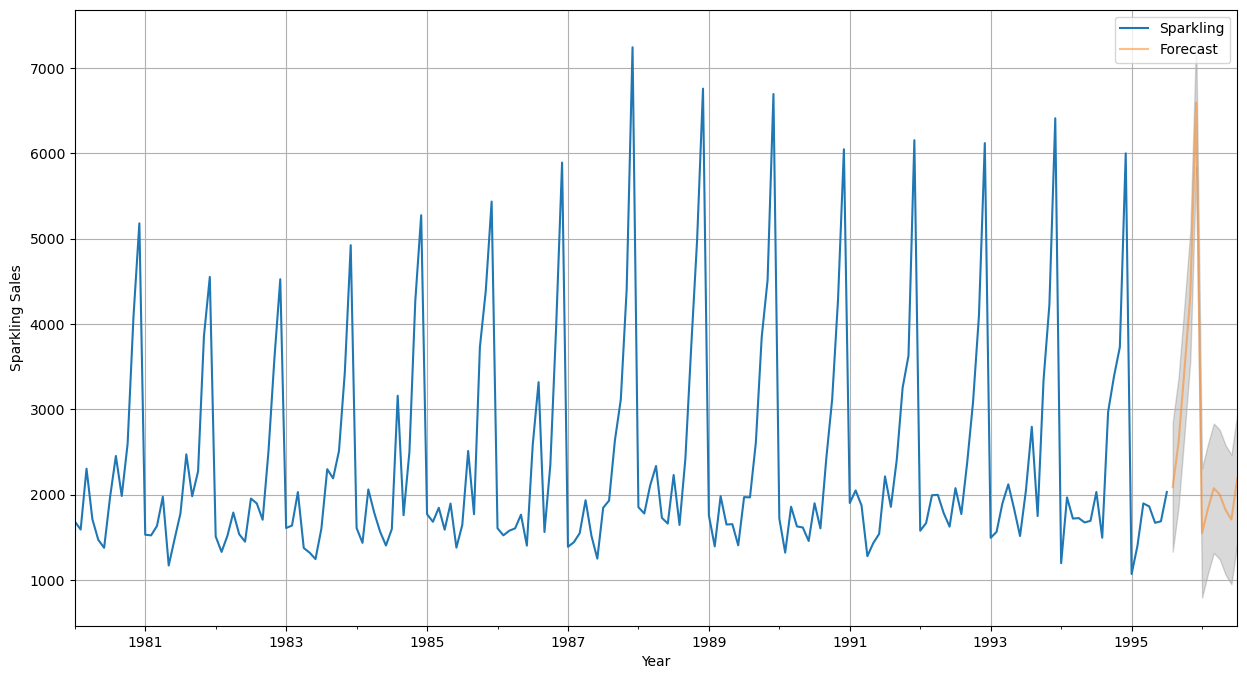

In [186]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,8))
fpred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(fpred_df.index, fpred_df['lower_CI'], fpred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

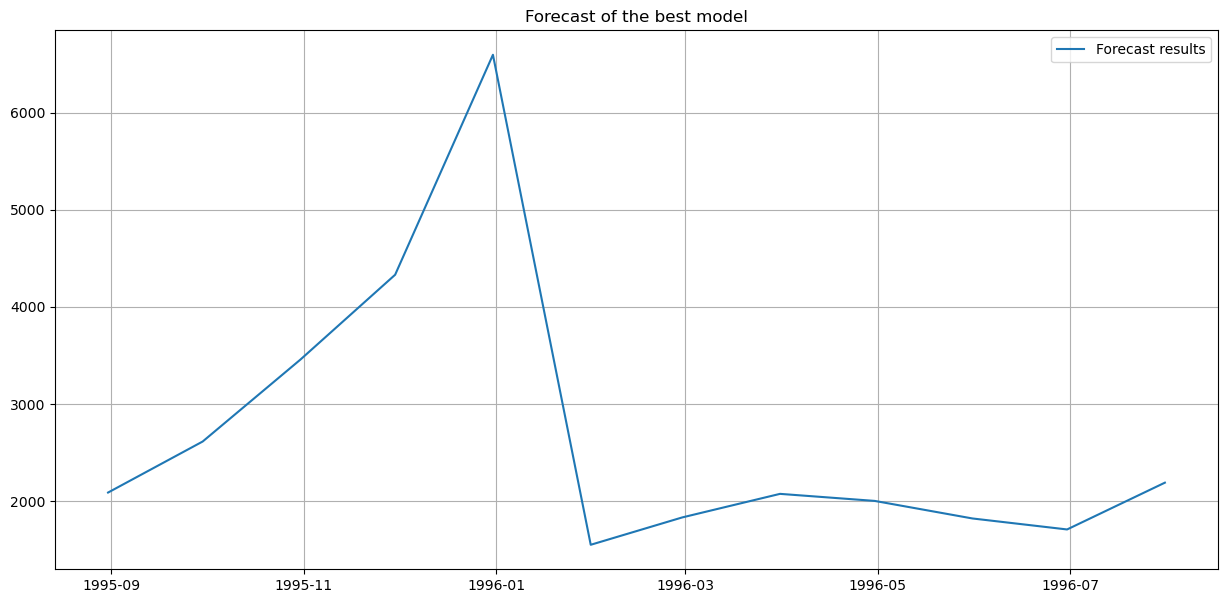

In [187]:
plt.figure(figsize=(15,7))

plt.plot(final_prediction, label="Forecast results")

plt.legend(loc='best')
plt.grid();
plt.title("Forecast of the best model");